In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Nome do ficheiro CSV
ficheiro = '/Users/emanuelmiranda/Desktop/Exp1/Dados/Exp1.csv'

# Ler os dados do ficheiro, ignorando a primeira linha
dados = pd.read_csv(ficheiro, delimiter=';', decimal=',', skiprows=1, header=None)

# Definir as colunas manualmente
dados.columns = ["Temperatura (C)", "Amperagem(µA)", "Resistência(Ω)"]

# Converter as colunas para números, forçando erros a se tornarem NaN
dados["Temperatura (C)"] = pd.to_numeric(dados["Temperatura (C)"], errors='coerce')
dados["Amperagem(µA)"] = pd.to_numeric(dados["Amperagem(µA)"], errors='coerce')
dados["Resistência(Ω)"] = pd.to_numeric(dados["Resistência(Ω)"], errors='coerce')
print(dados["Resistência(Ω)"])
print(dados["Temperatura (C)"])
print(dados["Amperagem(µA)"])


0      107.2
1      107.3
2      107.4
3      107.6
4      107.7
       ...  
153    113.0
154    112.7
155    112.5
156    112.3
157    112.0
Name: Resistência(Ω), Length: 158, dtype: float64
0      19.1
1      19.2
2      19.3
3      19.4
4      19.5
       ... 
153    32.0
154    31.5
155    31.0
156    30.5
157    30.0
Name: Temperatura (C), Length: 158, dtype: float64
0     -0.008
1     -0.009
2     -0.009
3     -0.010
4     -0.010
       ...  
153   -0.020
154   -0.019
155   -0.019
156   -0.018
157   -0.018
Name: Amperagem(µA), Length: 158, dtype: float64


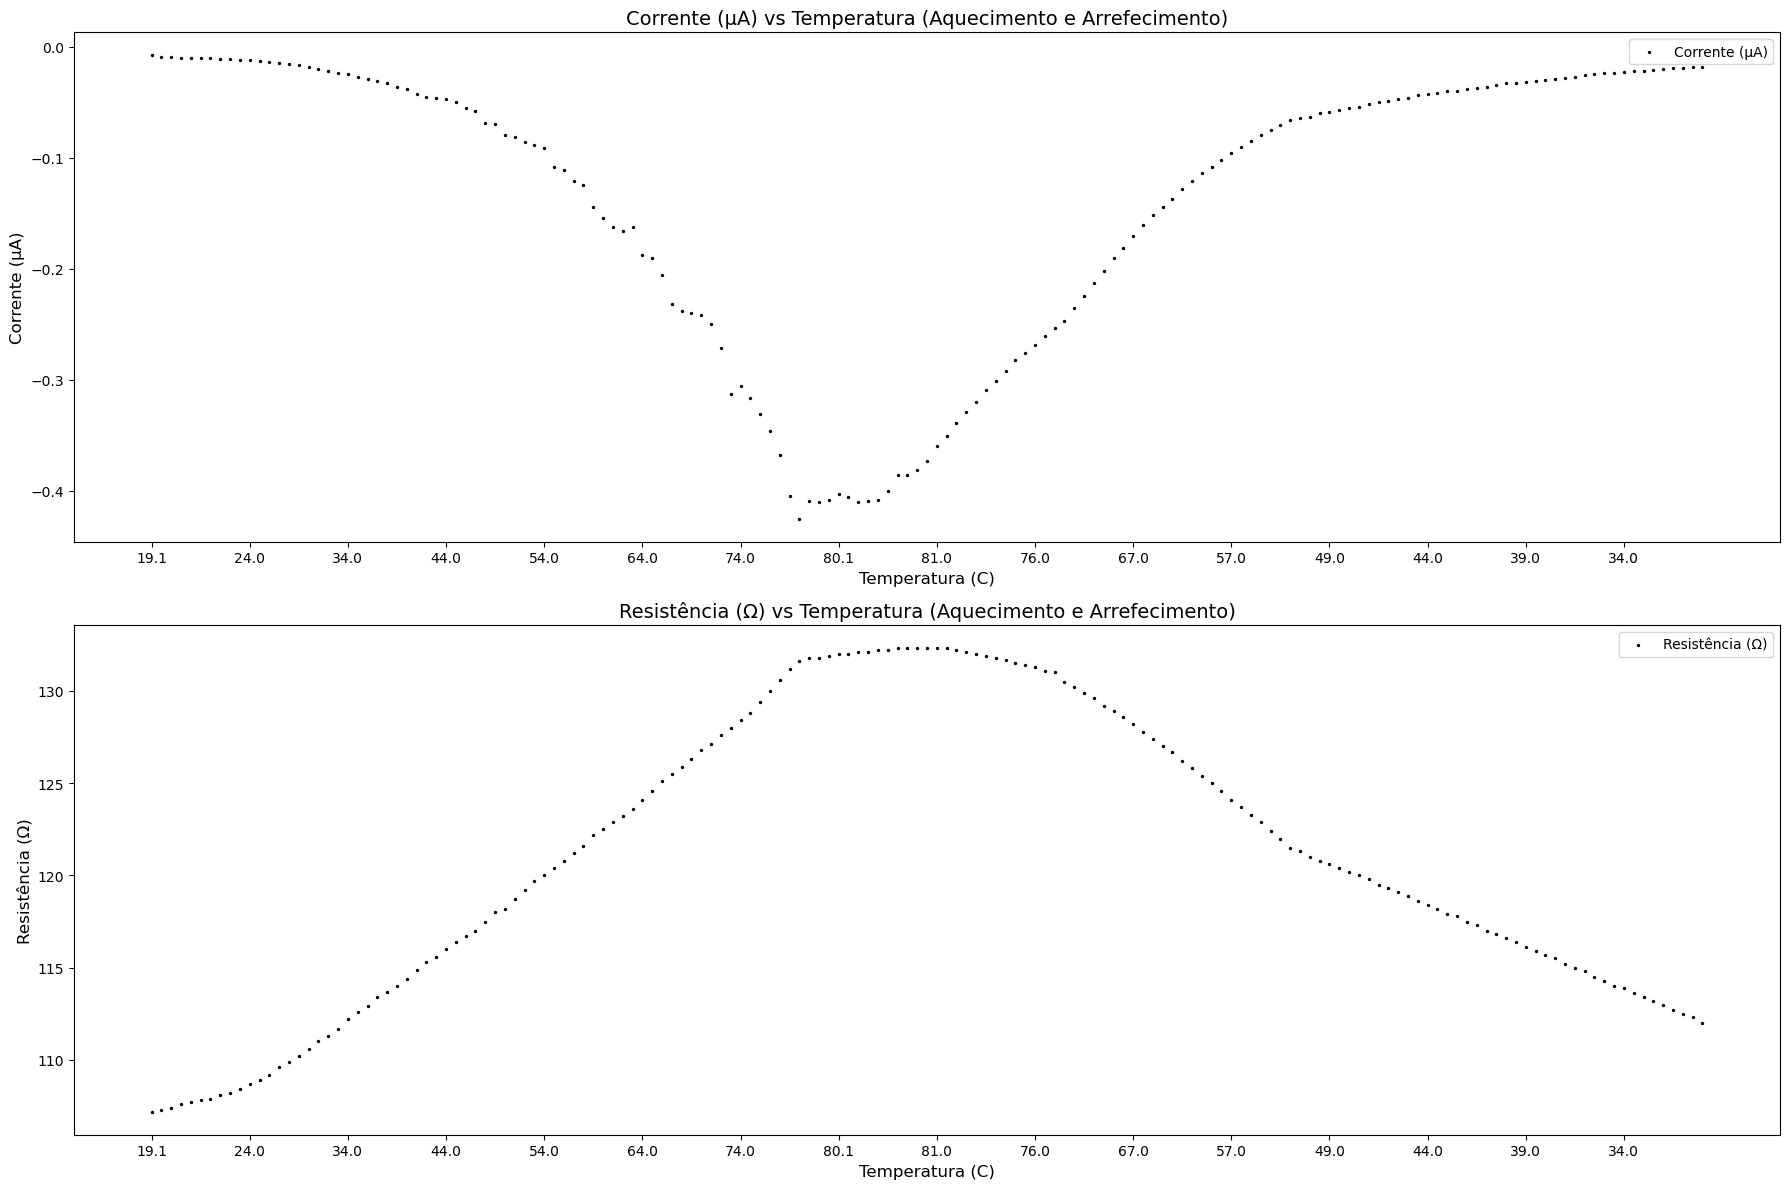

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Nome do ficheiro CSV
ficheiro = '/Users/emanuelmiranda/Desktop/Exp1/Dados/Exp1.csv'

# Ler os dados do ficheiro, ignorando a primeira linha
dados = pd.read_csv(ficheiro, delimiter=';', decimal=',', skiprows=1, header=None)

# Definir as colunas manualmente
dados.columns = ["Temperatura (C)", "Amperagem(µA)", "Resistência(Ω)"]

# Converter as colunas para números, forçando erros a se tornarem NaN
dados["Temperatura (C)"] = pd.to_numeric(dados["Temperatura (C)"], errors='coerce')
dados["Amperagem(µA)"] = pd.to_numeric(dados["Amperagem(µA)"], errors='coerce')
dados["Resistência(Ω)"] = pd.to_numeric(dados["Resistência(Ω)"], errors='coerce')

# Encontrar o índice onde a temperatura atinge o seu valor máximo
indice_max_temp = dados["Temperatura (C)"].idxmax()

# Separar os dados em ciclo crescente (aquecimento) e decrescente (arrefecimento)
dados_crescente = dados.iloc[:indice_max_temp + 1]  # Dados do ciclo crescente (aquecimento)
dados_decrescente = dados.iloc[indice_max_temp:]  # Dados do ciclo decrescente (arrefecimento)

# Concatenar as duas partes para manter a ordem temporal (aquecimento seguido de arrefecimento)
dados_ordem_temporal = pd.concat([dados_crescente, dados_decrescente]).reset_index(drop=True)

# Configurar rótulos personalizados para o eixo x
temperaturas = list(dados_crescente["Temperatura (C)"]) + list(dados_decrescente["Temperatura (C)"])

# Criar subplots (2 linhas e 1 coluna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Gráfico 1: Corrente em função da temperatura
ax1.scatter(dados_ordem_temporal.index, dados_ordem_temporal["Amperagem(µA)"], color='black', label='Corrente (µA)', s=2)
ax1.set_title('Corrente (µA) vs Temperatura (Aquecimento e Arrefecimento)', fontsize=14)
ax1.set_xlabel('Temperatura (C)', fontsize=12)
ax1.set_ylabel('Corrente (µA)', fontsize=12)
ax1.set_xticks(dados_ordem_temporal.index[::10])
ax1.set_xticklabels([f"{temp:.1f}" for temp in temperaturas[::10]])
ax1.legend()

# Gráfico 2: Resistência em função da temperatura
ax2.scatter(dados_ordem_temporal.index, dados_ordem_temporal["Resistência(Ω)"], color='black', label='Resistência (Ω)', s=2)
ax2.set_title('Resistência (Ω) vs Temperatura (Aquecimento e Arrefecimento)', fontsize=14)
ax2.set_xlabel('Temperatura (C)', fontsize=12)
ax2.set_ylabel('Resistência (Ω)', fontsize=12)
ax2.set_xticks(dados_ordem_temporal.index[::10])
ax2.set_xticklabels([f"{temp:.1f}" for temp in temperaturas[::10]])
ax2.legend()

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

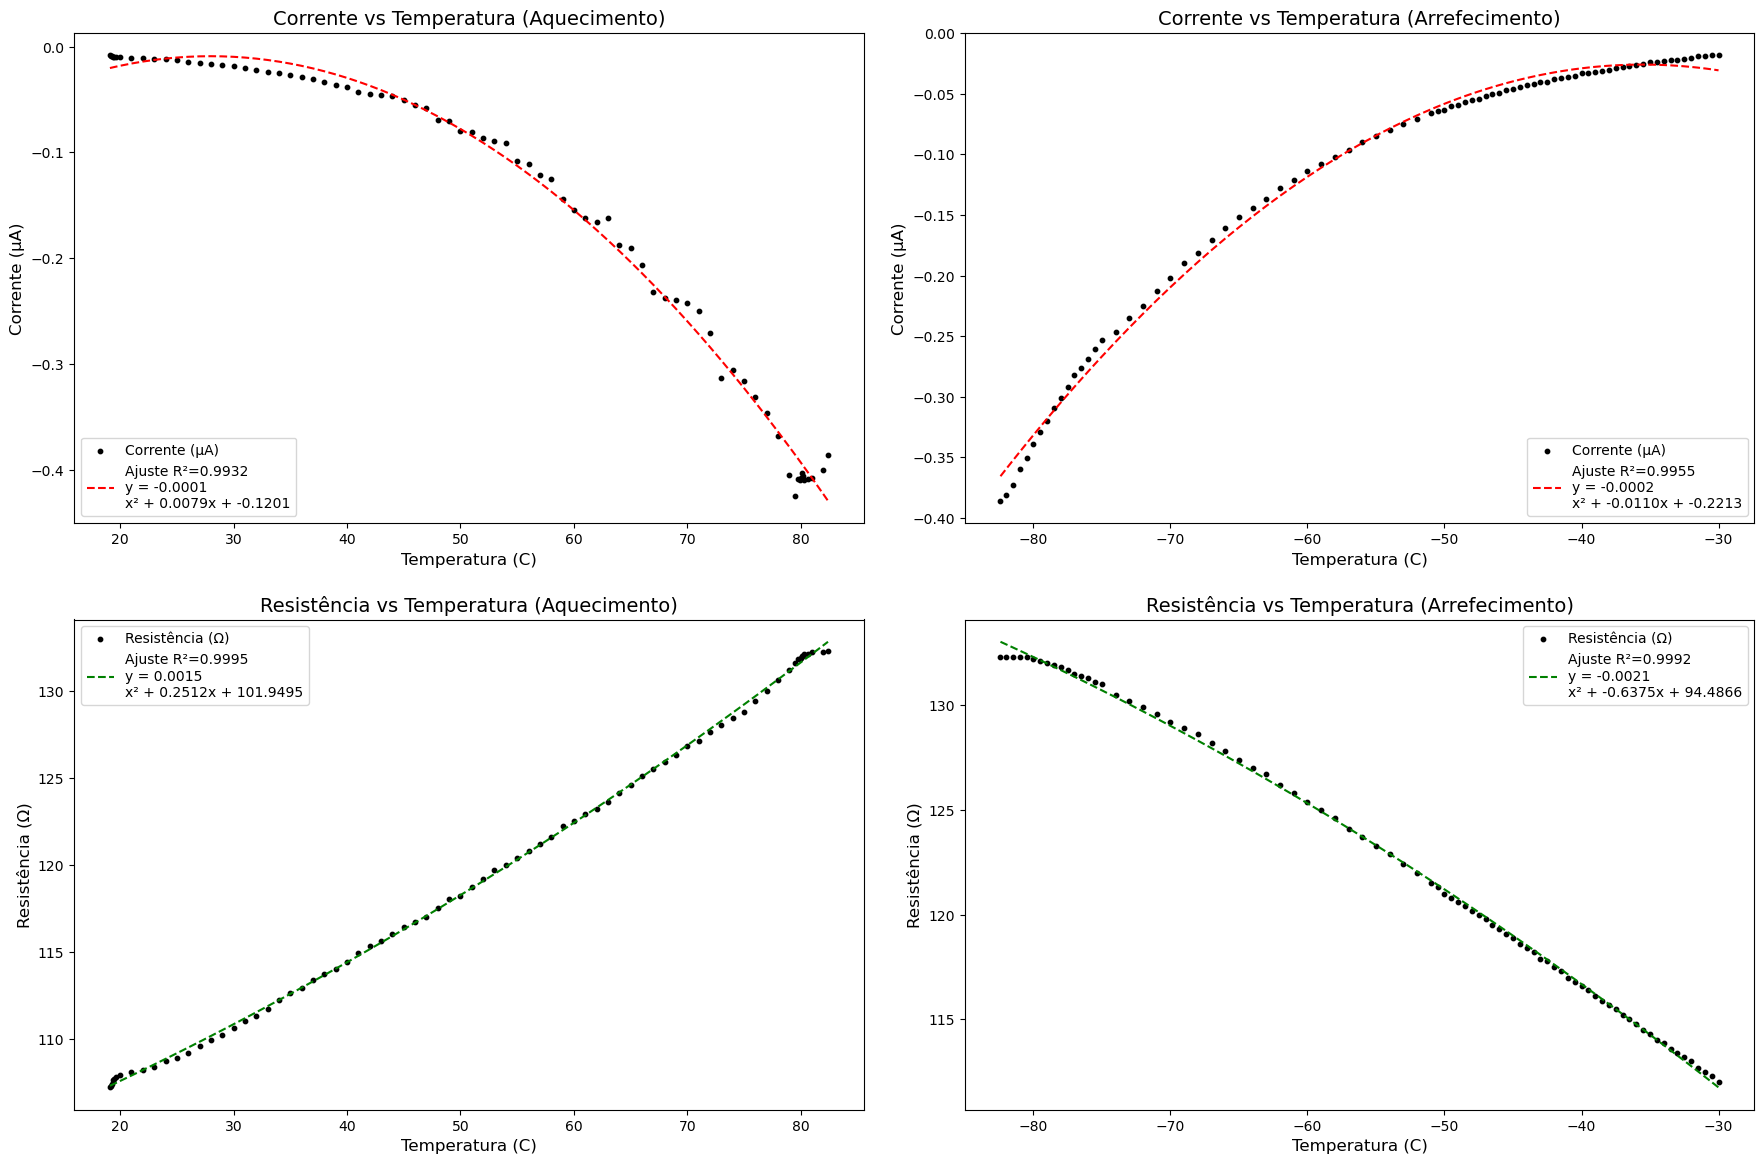

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Nome do ficheiro CSV
ficheiro = '/Users/emanuelmiranda/Desktop/Exp1/Dados/Exp1.csv'

# Ler os dados do ficheiro, ignorando a primeira linha
dados = pd.read_csv(ficheiro, delimiter=';', decimal=',', skiprows=1, header=None)

# Definir as colunas manualmente
dados.columns = ["Temperatura (C)", "Amperagem(µA)", "Resistência(Ω)"]

# Converter as colunas para números, forçando erros a se tornarem NaN
dados["Temperatura (C)"] = pd.to_numeric(dados["Temperatura (C)"], errors='coerce')
dados["Amperagem(µA)"] = pd.to_numeric(dados["Amperagem(µA)"], errors='coerce')
dados["Resistência(Ω)"] = pd.to_numeric(dados["Resistência(Ω)"], errors='coerce')

# Encontrar o índice onde a temperatura atinge o seu valor máximo
indice_max_temp = dados["Temperatura (C)"].idxmax()

# Separar os dados em ciclo crescente (aquecimento) e decrescente (arrefecimento)
dados_crescente = dados.iloc[:indice_max_temp + 1]  # Dados do ciclo crescente (aquecimento)
dados_decrescente = dados.iloc[indice_max_temp:]  # Dados do ciclo decrescente (arrefecimento)

# Para o ciclo de arrefecimento, remover qualquer dado em que a temperatura esteja subindo
dados_decrescente = dados_decrescente[dados_decrescente["Temperatura (C)"] <= dados_decrescente["Temperatura (C)"].max()]

# Ordenar os dados do ciclo de arrefecimento para garantir que a temperatura diminua
dados_decrescente = dados_decrescente.sort_values(by="Temperatura (C)", ascending=False)

# Aplicar x = -x para inverter o eixo x nos gráficos de arrefecimento
dados_decrescente["Temperatura (C)"] = -dados_decrescente["Temperatura (C)"]

# Função para ajuste polinomial de 2º grau
def ajuste_polinomial(x, a, b, c):
    return a * x**2 + b * x + c

# Função para calcular R²
def calcular_r2(y, y_ajuste):
    ss_res = np.sum((y - y_ajuste) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Criar uma figura com 2 linhas e 2 colunas de subplots (corrente na linha 1, resistência na linha 2)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # Aumentando a altura para dar mais espaço

# Definir os títulos dos subplots
titulos = ['Aquecimento', 'Arrefecimento']
dados_list = [dados_crescente, dados_decrescente]

# Plotar nos subplots
for i in range(len(dados_list)):
    # Gráfico para corrente
    ax_corrente = axs[0, i]
    dados_atual = dados_list[i]

    # Scatter para os dados originais (corrente)
    ax_corrente.scatter(dados_atual["Temperatura (C)"], dados_atual["Amperagem(µA)"], color='black', label='Corrente (µA)', s=10)

    # Ajuste polinomial para corrente
    params_poly, _ = curve_fit(ajuste_polinomial, dados_atual["Temperatura (C)"], dados_atual["Amperagem(µA)"])
    y_ajuste_poly = ajuste_polinomial(dados_atual["Temperatura (C)"], *params_poly)
    r2_poly = calcular_r2(dados_atual["Amperagem(µA)"], y_ajuste_poly)
    equacao_polinomial_corrente = f"y = {params_poly[0]:.4f}\nx² + {params_poly[1]:.4f}x + {params_poly[2]:.4f}"
    ax_corrente.plot(dados_atual["Temperatura (C)"], y_ajuste_poly, 'r--', 
                     label=f'Ajuste R²={r2_poly:.4f}\n{equacao_polinomial_corrente}')

    # Título e rótulos para o gráfico da corrente
    ax_corrente.set_title(f'Corrente vs Temperatura ({titulos[i]})', fontsize=14)
    ax_corrente.set_xlabel('Temperatura (C)', fontsize=12)
    ax_corrente.set_ylabel('Corrente (µA)', fontsize=12)
    ax_corrente.legend(loc='lower left' if i == 0 else 'lower right', fontsize=10)

    # Gráfico para resistência (resistividade)
    ax_resistencia = axs[1, i]

    # Scatter para os dados originais (resistência)
    ax_resistencia.scatter(dados_atual["Temperatura (C)"], dados_atual["Resistência(Ω)"], color='black', label='Resistência (Ω)', s=10)

    # Ajuste polinomial para resistência
    params_poly_res, _ = curve_fit(ajuste_polinomial, dados_atual["Temperatura (C)"], dados_atual["Resistência(Ω)"])
    y_ajuste_poly_res = ajuste_polinomial(dados_atual["Temperatura (C)"], *params_poly_res)
    r2_poly_res = calcular_r2(dados_atual["Resistência(Ω)"], y_ajuste_poly_res)
    equacao_polinomial_res = f"y = {params_poly_res[0]:.4f}\nx² + {params_poly_res[1]:.4f}x + {params_poly_res[2]:.4f}"
    ax_resistencia.plot(dados_atual["Temperatura (C)"], y_ajuste_poly_res, 'g--', 
                        label=f'Ajuste R²={r2_poly_res:.4f}\n{equacao_polinomial_res}')

    # Título e rótulos para o gráfico da resistência
    ax_resistencia.set_title(f'Resistência vs Temperatura ({titulos[i]})', fontsize=14)
    ax_resistencia.set_xlabel('Temperatura (C)', fontsize=12)
    ax_resistencia.set_ylabel('Resistência (Ω)', fontsize=12)
    ax_resistencia.legend(loc='upper left' if i == 0 else 'upper right', fontsize=10)

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout(pad=2.0)
plt.show()

# R/R0

## Linear

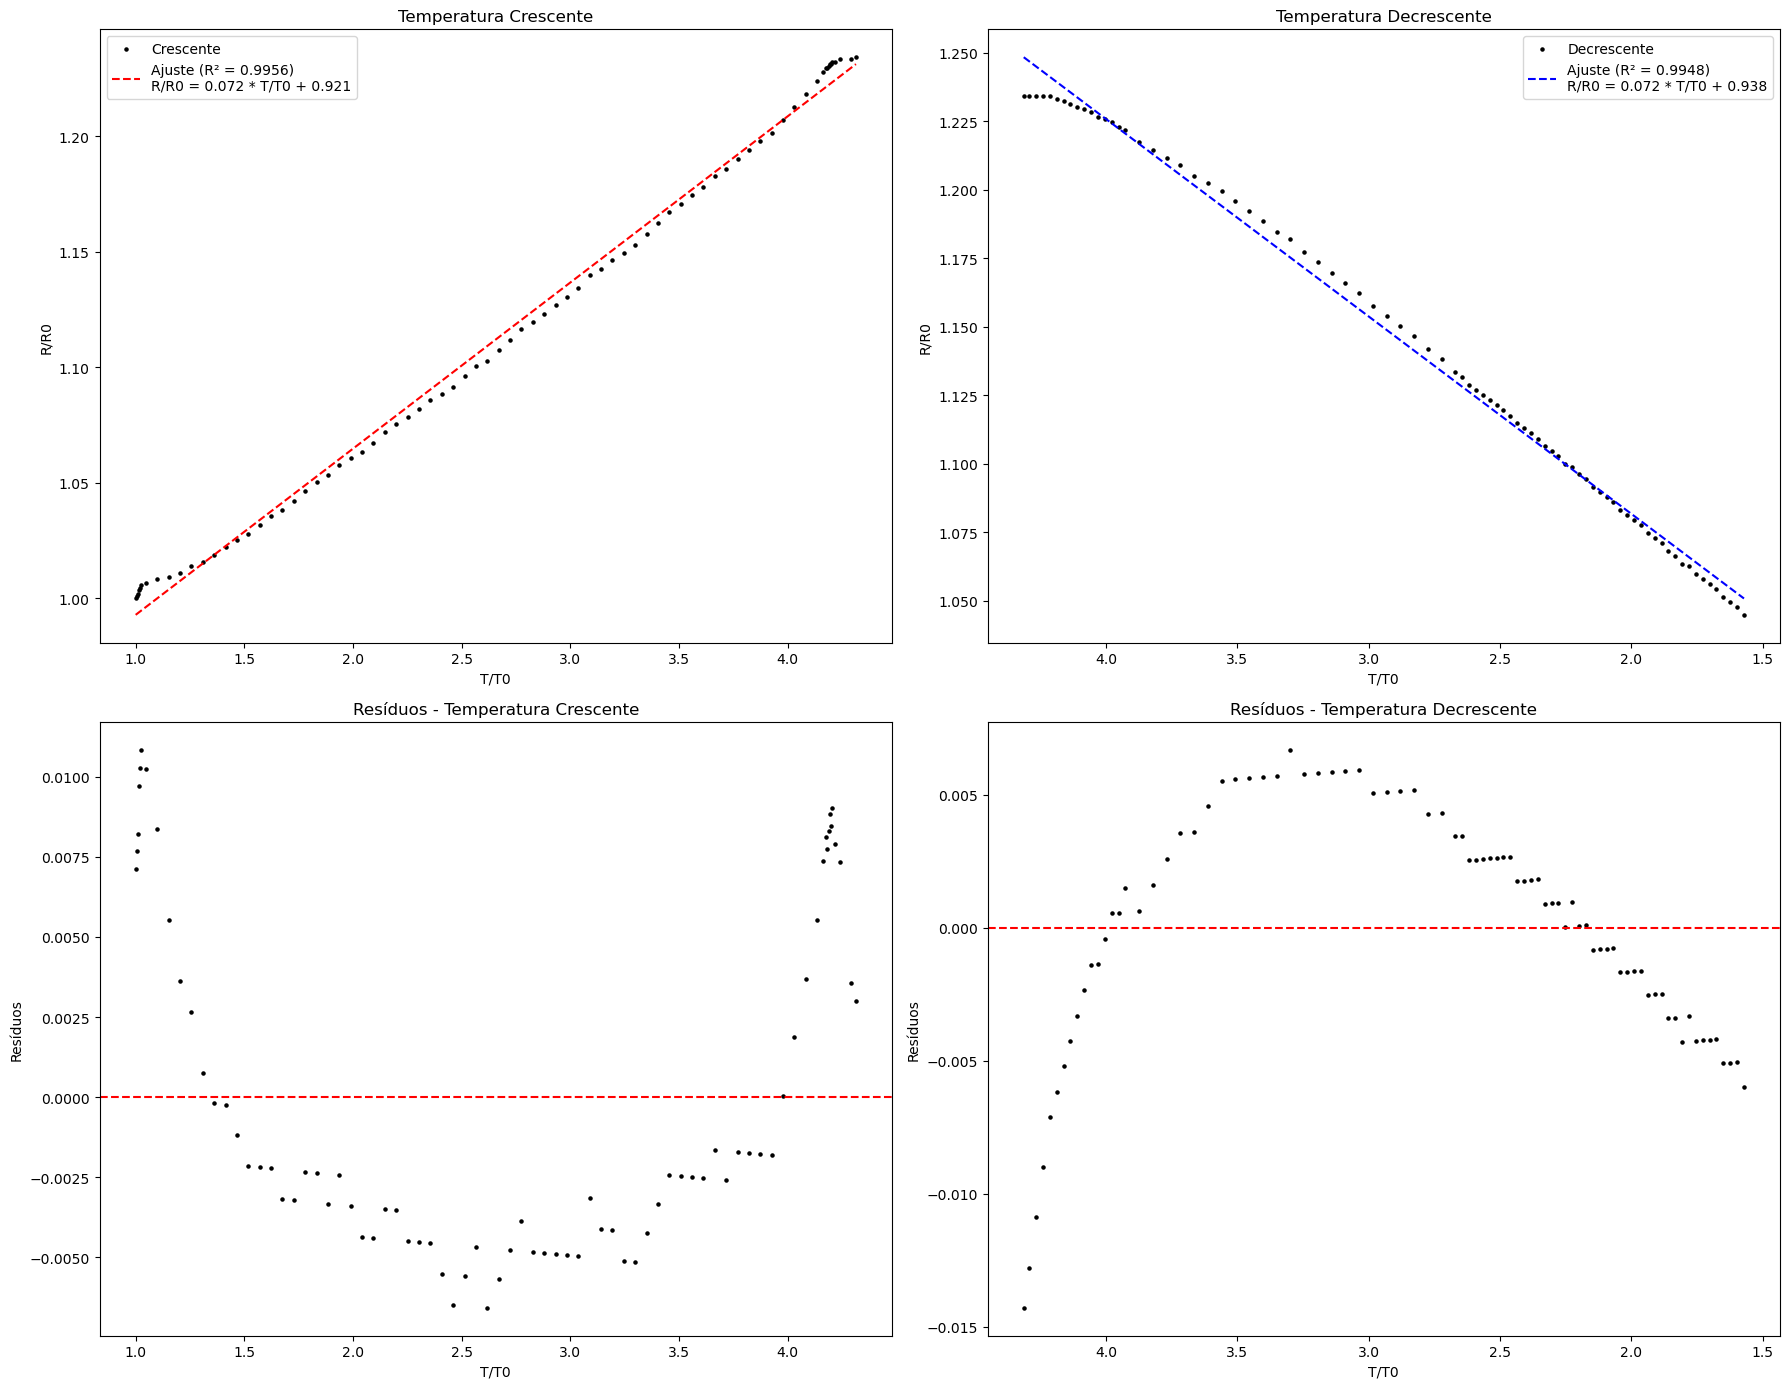

Alpha para a temperatura crescente: 0.00376
Alpha para a temperatura decrescente: 0.00377
Ordenada na origem (b) para o ajuste crescente: 0.92099
Ordenada na origem (b) para o ajuste decrescente: 0.93757
Incerteza para os dados crescentes: 0.00055
Incerteza para os dados decrescentes: 0.00058


In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir R0 e T0 a partir do primeiro valor dos dados crescentes
R0 = dados_crescentes['Resistência(Ω)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]

# Calcular R/R0 e T/T0 para os dados crescentes
dados_crescentes['R/R0'] = dados_crescentes['Resistência(Ω)'] / R0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular R/R0 e T/T0 para os dados decrescentes usando o mesmo R0 e T0
dados_decrescentes['R/R0'] = dados_decrescentes['Resistência(Ω)'] / R0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Ajuste linear para os dados crescentes
slope_cres, intercept_cres, r_value_cres, _, _ = linregress(dados_crescentes['T/T0'], dados_crescentes['R/R0'])

# Ajuste linear para os dados decrescentes
slope_dec, intercept_dec, r_value_dec, _, _ = linregress(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'])

# Calcular os valores ajustados para os dados crescentes e decrescentes
dados_crescentes['R ajustada'] = slope_cres * dados_crescentes['T/T0'] + intercept_cres
dados_decrescentes['R ajustada'] = slope_dec * dados_decrescentes['T/T0'] + intercept_dec

# Calcular os resíduos
dados_crescentes['Resíduo'] = dados_crescentes['R/R0'] - dados_crescentes['R ajustada']
dados_decrescentes['Resíduo'] = dados_decrescentes['R/R0'] - dados_decrescentes['R ajustada']

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['R/R0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], slope_cres * dados_crescentes['T/T0'] + intercept_cres, color='red', linestyle='--', 
              label=f'Ajuste (R² = {r_value_cres**2:.4f})\nR/R0 = {slope_cres:.3f} * T/T0 + {intercept_cres:.3f}')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('R/R0')
ax[0, 0].legend()

# Gráfico para os dados decrescentes com T/T0 em ordem inversa
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], slope_dec * dados_decrescentes['T/T0'] + intercept_dec, color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r_value_dec**2:.4f})\nR/R0 = {slope_dec:.3f} * T/T0 + {intercept_dec:.3f}')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('R/R0')
ax[0, 1].legend()

# Inverter o eixo x do gráfico decrescente
ax[0, 1].invert_xaxis()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['Resíduo'], color='black', s=5)
ax[1, 0].axhline(0, color='red', linestyle='--')
ax[1, 0].set_title('Resíduos - Temperatura Crescente')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico dos resíduos para os dados decrescentes com T/T0 em ordem inversa
ax[1, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['Resíduo'], color='black', s=5)
ax[1, 1].axhline(0, color='red', linestyle='--')
ax[1, 1].set_title('Resíduos - Temperatura Decrescente')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

# Calcular alpha para os dados crescentes e decrescentes
alpha_cres = slope_cres / T0
alpha_dec = slope_dec / T0

# Imprimir os valores de alpha e intercepto (b)
print(f"Alpha para a temperatura crescente: {alpha_cres:.5f}")
print(f"Alpha para a temperatura decrescente: {alpha_dec:.5f}")
print(f"Ordenada na origem (b) para o ajuste crescente: {intercept_cres:.5f}")
print(f"Ordenada na origem (b) para o ajuste decrescente: {intercept_dec:.5f}")

# Ajuste linear para os dados crescentes
slope_cres, intercept_cres, r_value_cres, p_value_cres, stderr_cres = linregress(dados_crescentes['T/T0'], dados_crescentes['R/R0'])

# Ajuste linear para os dados decrescentes
slope_dec, intercept_dec, r_value_dec, p_value_dec, stderr_dec = linregress(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'])

# Exibir a incerteza no declive (erro padrão)
print(f"Incerteza para os dados crescentes: {stderr_cres:.5f}")
print(f"Incerteza para os dados decrescentes: {stderr_dec:.5f}")


## Quadrático

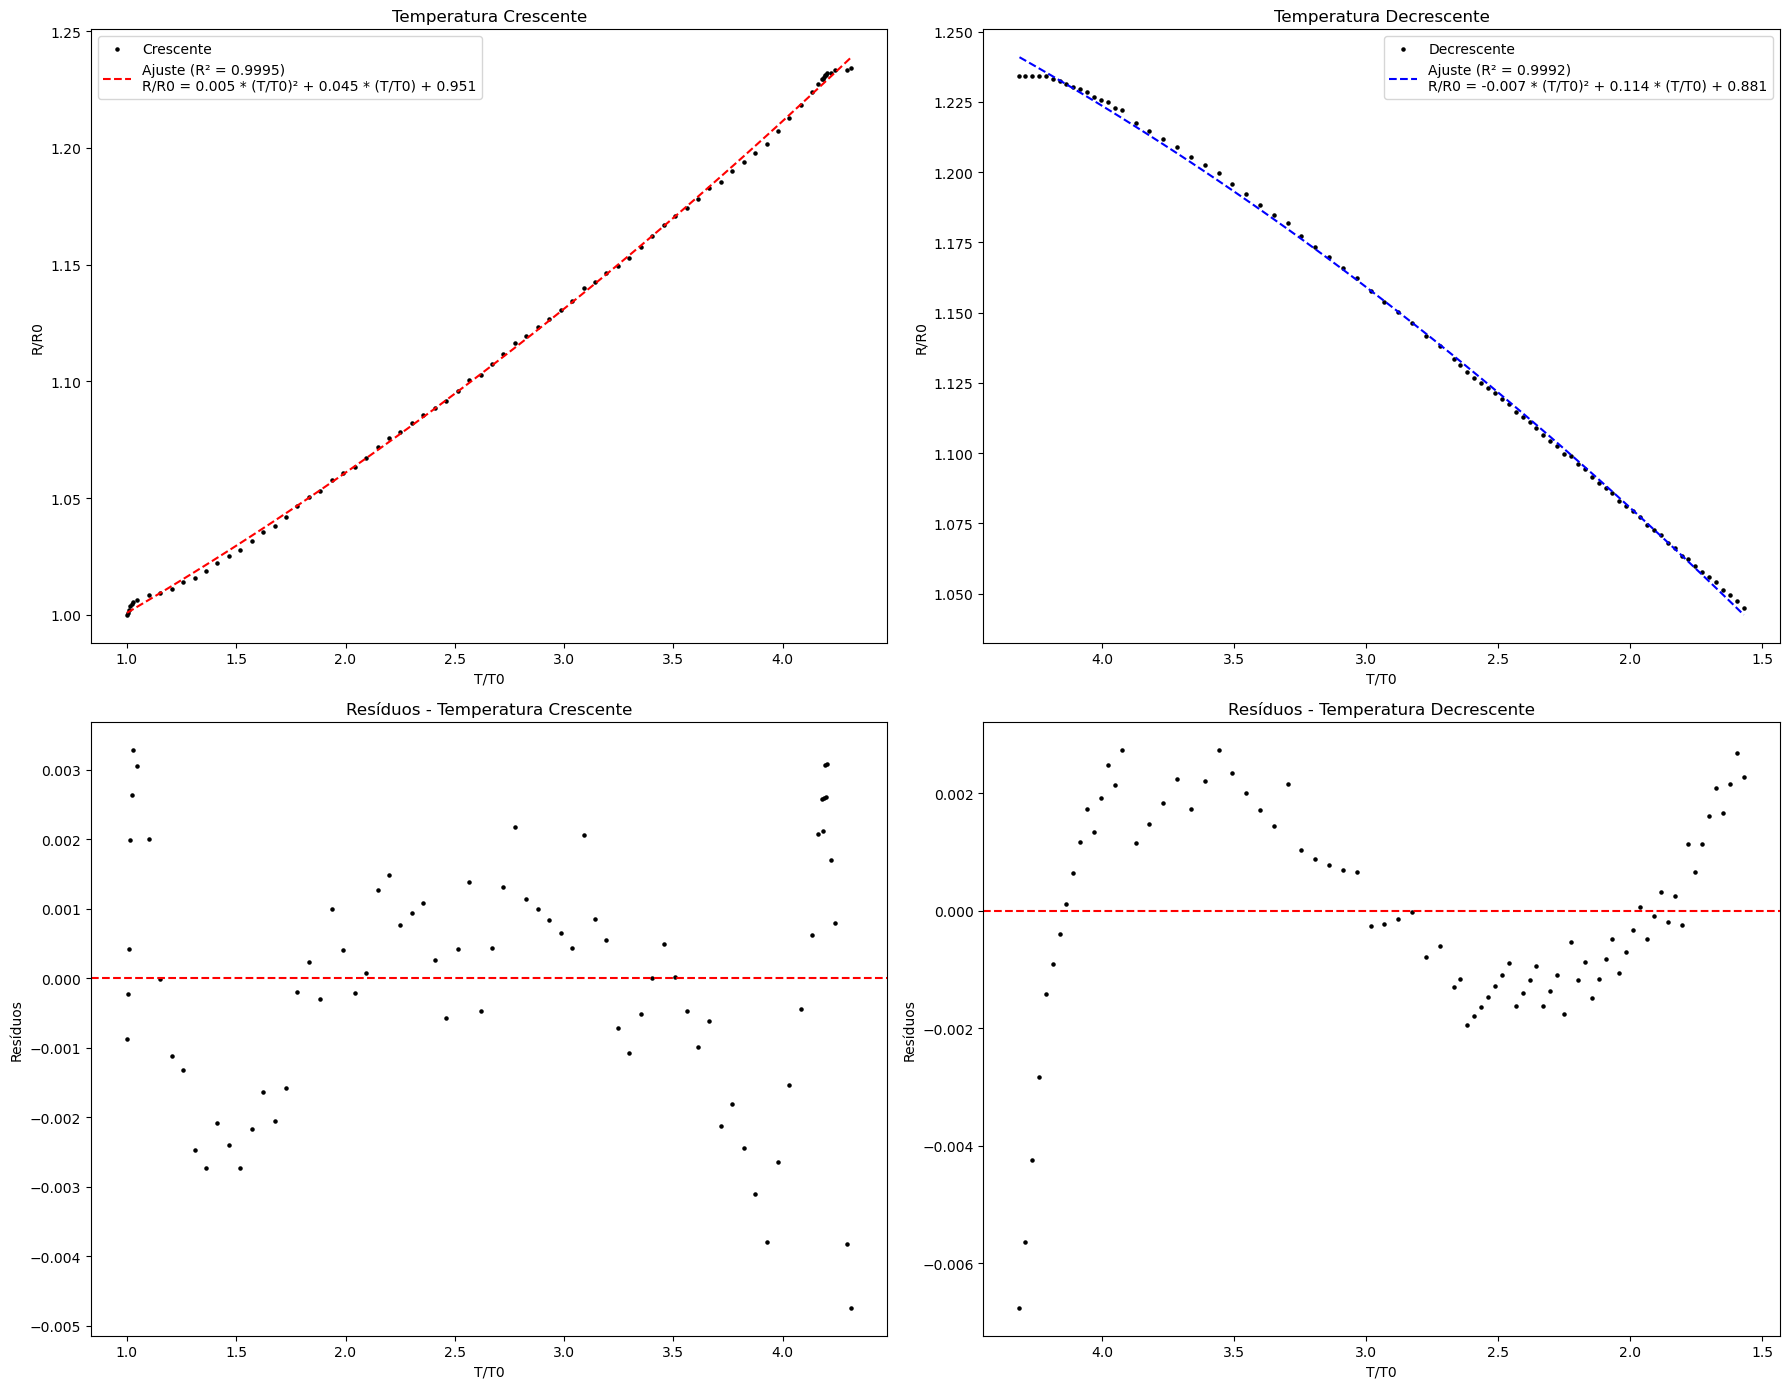

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir R0 e T0 a partir do primeiro valor dos dados crescentes
R0 = dados_crescentes['Resistência(Ω)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]

# Calcular R/R0 e T/T0 para os dados crescentes
dados_crescentes['R/R0'] = dados_crescentes['Resistência(Ω)'] / R0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular R/R0 e T/T0 para os dados decrescentes usando o mesmo R0 e T0
dados_decrescentes['R/R0'] = dados_decrescentes['Resistência(Ω)'] / R0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Ajuste polinomial de grau 2 para os dados crescentes
coef_cres = np.polyfit(dados_crescentes['T/T0'], dados_crescentes['R/R0'], 2)
poly_cres = np.poly1d(coef_cres)

# Ajuste polinomial de grau 2 para os dados decrescentes
coef_dec = np.polyfit(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'], 2)
poly_dec = np.poly1d(coef_dec)

# Calcular R^2 para os dados crescentes
y_cres = dados_crescentes['R/R0']
y_cres_fit = poly_cres(dados_crescentes['T/T0'])
ss_res_cres = np.sum((y_cres - y_cres_fit) ** 2)
ss_tot_cres = np.sum((y_cres - np.mean(y_cres)) ** 2)
r2_cres = 1 - (ss_res_cres / ss_tot_cres)

# Calcular R^2 para os dados decrescentes
y_dec = dados_decrescentes['R/R0']
y_dec_fit = poly_dec(dados_decrescentes['T/T0'])
ss_res_dec = np.sum((y_dec - y_dec_fit) ** 2)
ss_tot_dec = np.sum((y_dec - np.mean(y_dec)) ** 2)
r2_dec = 1 - (ss_res_dec / ss_tot_dec)

# Calcular os resíduos para os dados crescentes e decrescentes
dados_crescentes['Resíduo'] = dados_crescentes['R/R0'] - y_cres_fit
dados_decrescentes['Resíduo'] = dados_decrescentes['R/R0'] - y_dec_fit

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['R/R0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], poly_cres(dados_crescentes['T/T0']), color='red', linestyle='--', 
              label=f'Ajuste (R² = {r2_cres:.4f})\nR/R0 = {coef_cres[0]:.3f} * (T/T0)² + {coef_cres[1]:.3f} * (T/T0) + {coef_cres[2]:.3f}')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('R/R0')
ax[0, 0].legend()

# Gráfico para os dados decrescentes com T/T0 em ordem inversa
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], poly_dec(dados_decrescentes['T/T0']), color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r2_dec:.4f})\nR/R0 = {coef_dec[0]:.3f} * (T/T0)² + {coef_dec[1]:.3f} * (T/T0) + {coef_dec[2]:.3f}')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('R/R0')
ax[0, 1].legend()

# Inverter o eixo x do gráfico decrescente
ax[0, 1].invert_xaxis()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['Resíduo'], color='black', s=5)
ax[1, 0].axhline(0, color='red', linestyle='--')
ax[1, 0].set_title('Resíduos - Temperatura Crescente')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico dos resíduos para os dados decrescentes com T/T0 em ordem inversa
ax[1, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['Resíduo'], color='black', s=5)
ax[1, 1].axhline(0, color='red', linestyle='--')
ax[1, 1].set_title('Resíduos - Temperatura Decrescente')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Cúbica

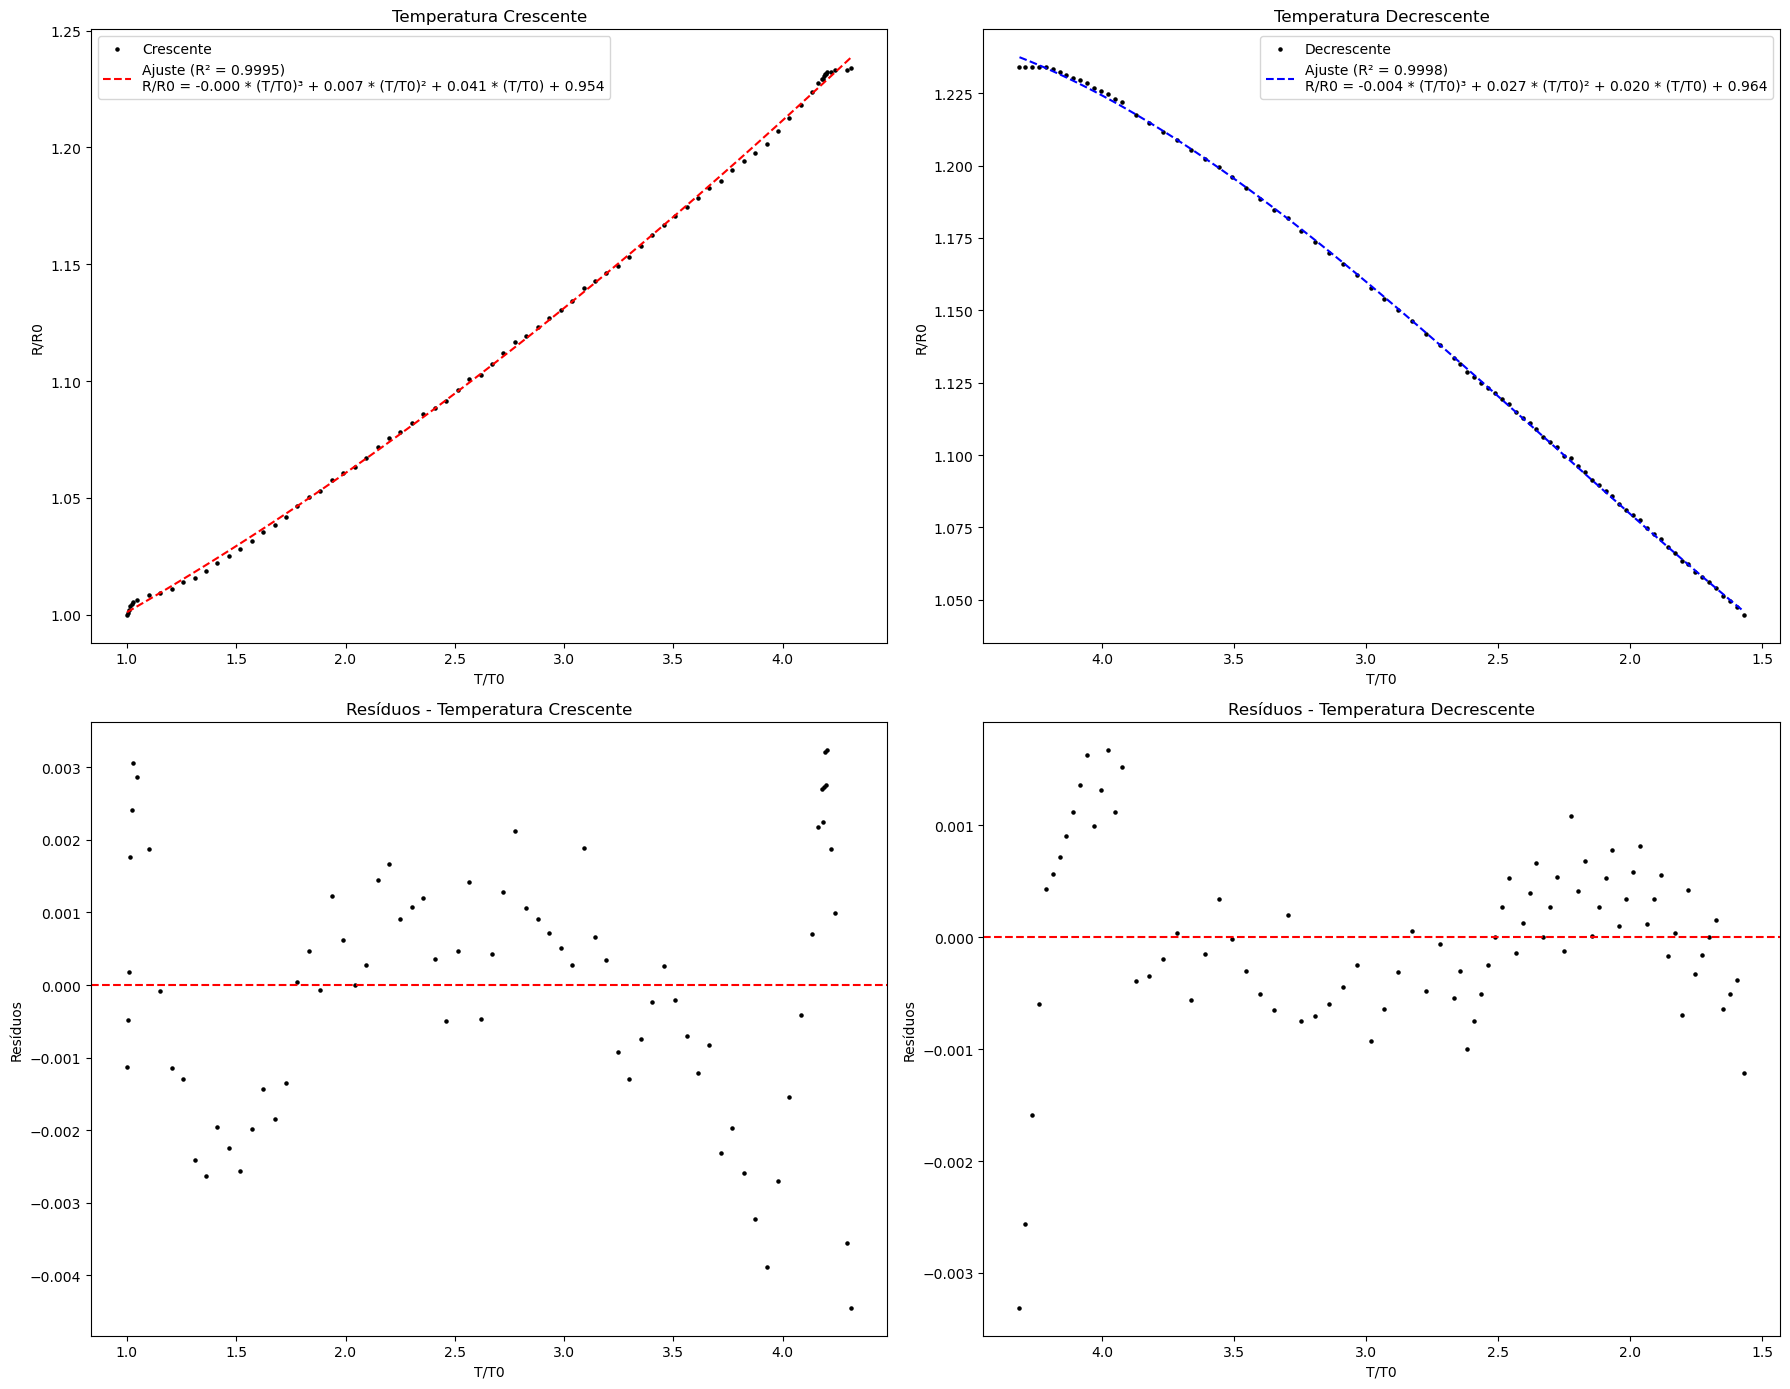

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir R0 e T0 a partir do primeiro valor dos dados crescentes
R0 = dados_crescentes['Resistência(Ω)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]

# Calcular R/R0 e T/T0 para os dados crescentes
dados_crescentes['R/R0'] = dados_crescentes['Resistência(Ω)'] / R0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular R/R0 e T/T0 para os dados decrescentes usando o mesmo R0 e T0
dados_decrescentes['R/R0'] = dados_decrescentes['Resistência(Ω)'] / R0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Ajuste polinomial de grau 3 para os dados crescentes
coef_cres = np.polyfit(dados_crescentes['T/T0'], dados_crescentes['R/R0'], 3)
poly_cres = np.poly1d(coef_cres)

# Ajuste polinomial de grau 3 para os dados decrescentes
coef_dec = np.polyfit(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'], 3)
poly_dec = np.poly1d(coef_dec)

# Calcular R^2 para os dados crescentes
y_cres = dados_crescentes['R/R0']
y_cres_fit = poly_cres(dados_crescentes['T/T0'])
ss_res_cres = np.sum((y_cres - y_cres_fit) ** 2)
ss_tot_cres = np.sum((y_cres - np.mean(y_cres)) ** 2)
r2_cres = 1 - (ss_res_cres / ss_tot_cres)

# Calcular R^2 para os dados decrescentes
y_dec = dados_decrescentes['R/R0']
y_dec_fit = poly_dec(dados_decrescentes['T/T0'])
ss_res_dec = np.sum((y_dec - y_dec_fit) ** 2)
ss_tot_dec = np.sum((y_dec - np.mean(y_dec)) ** 2)
r2_dec = 1 - (ss_res_dec / ss_tot_dec)

# Calcular os resíduos para os dados crescentes e decrescentes
dados_crescentes['Resíduo'] = dados_crescentes['R/R0'] - y_cres_fit
dados_decrescentes['Resíduo'] = dados_decrescentes['R/R0'] - y_dec_fit

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['R/R0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], poly_cres(dados_crescentes['T/T0']), color='red', linestyle='--', 
              label=f'Ajuste (R² = {r2_cres:.4f})\nR/R0 = {coef_cres[0]:.3f} * (T/T0)³ + {coef_cres[1]:.3f} * (T/T0)² + {coef_cres[2]:.3f} * (T/T0) + {coef_cres[3]:.3f}')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('R/R0')
ax[0, 0].legend()

# Gráfico para os dados decrescentes com T/T0 em ordem inversa
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['R/R0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], poly_dec(dados_decrescentes['T/T0']), color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r2_dec:.4f})\nR/R0 = {coef_dec[0]:.3f} * (T/T0)³ + {coef_dec[1]:.3f} * (T/T0)² + {coef_dec[2]:.3f} * (T/T0) + {coef_dec[3]:.3f}')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('R/R0')
ax[0, 1].legend()

# Inverter o eixo x do gráfico decrescente
ax[0, 1].invert_xaxis()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['Resíduo'], color='black', s=5)
ax[1, 0].axhline(0, color='red', linestyle='--')
ax[1, 0].set_title('Resíduos - Temperatura Crescente')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico dos resíduos para os dados decrescentes com T/T0 em ordem inversa
ax[1, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['Resíduo'], color='black', s=5)
ax[1, 1].axhline(0, color='red', linestyle='--')
ax[1, 1].set_title('Resíduos - Temperatura Decrescente')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

# I/I0

## Exponencial

-0.008 19.1


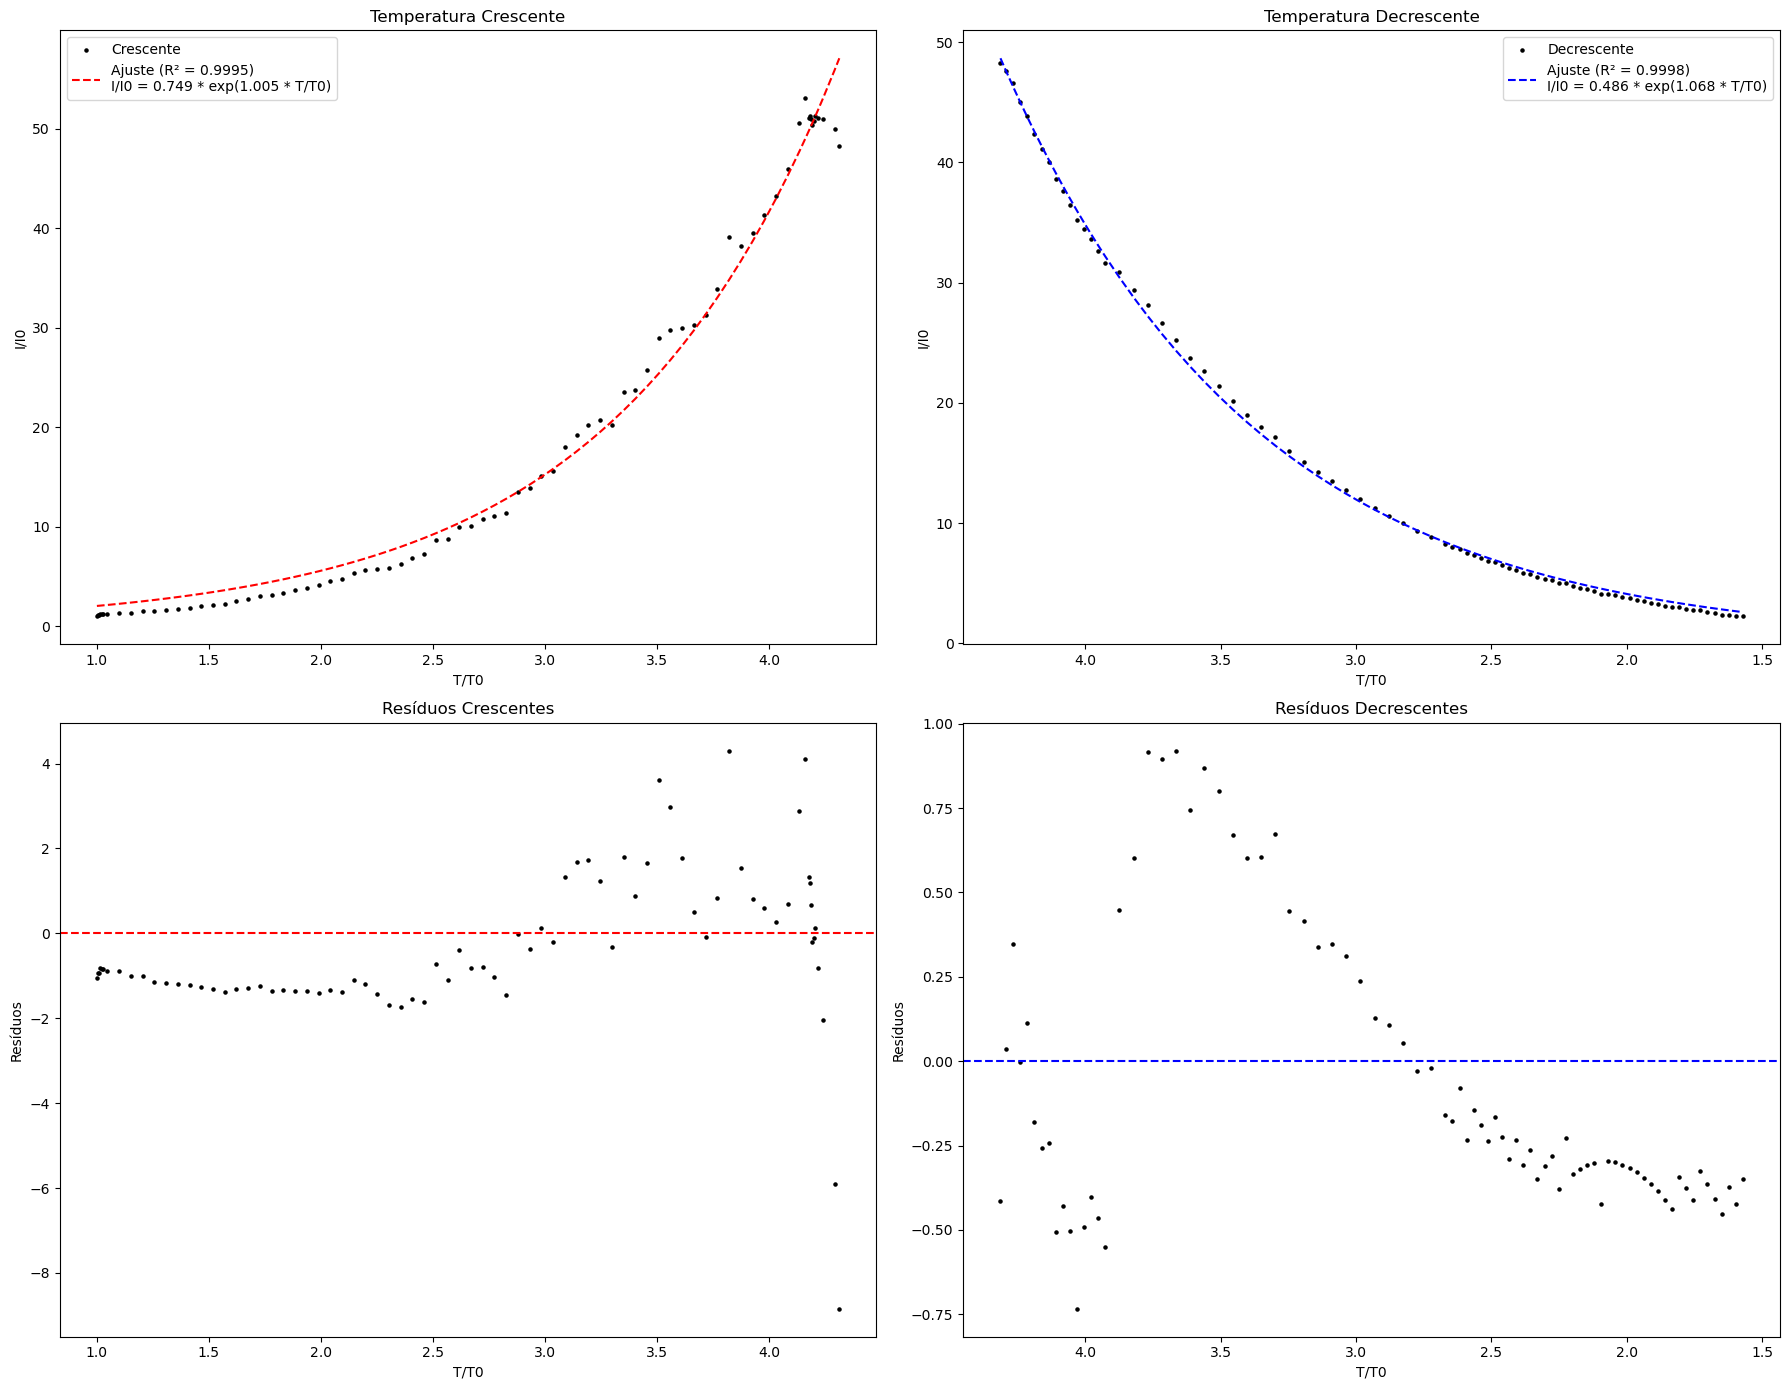

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir I0 e T0 a partir do primeiro valor dos dados crescentes
I0 = dados_crescentes['Amperagem(µA)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]
print(I0,T0)

# Calcular I/I0 e T/T0 para os dados crescentes
dados_crescentes['I/I0'] = dados_crescentes['Amperagem(µA)'] / I0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular I/I0 e T/T0 para os dados decrescentes usando o mesmo I0 e T0
dados_decrescentes['I/I0'] = dados_decrescentes['Amperagem(µA)'] / I0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Função exponencial para o ajuste
def func_exp(x, a, b):
    return a * np.exp(b * x)

# Ajuste exponencial para os dados crescentes
params_crescentes, _ = curve_fit(func_exp, dados_crescentes['T/T0'], dados_crescentes['I/I0'])
a_cres, b_cres = params_crescentes

# Calcular R^2 para os dados crescentes
y_cres = dados_crescentes['I/I0']
y_cres_fit = func_exp(dados_crescentes['T/T0'], a_cres, b_cres)
residuos_cres = y_cres - y_cres_fit  # Resíduos para os dados crescentes

# Ajuste exponencial para os dados decrescentes
params_decrescentes, _ = curve_fit(func_exp, dados_decrescentes['T/T0'], dados_decrescentes['I/I0'])
a_dec, b_dec = params_decrescentes

# Calcular R^2 para os dados decrescentes
y_dec = dados_decrescentes['I/I0']
y_dec_fit = func_exp(dados_decrescentes['T/T0'], a_dec, b_dec)
residuos_dec = y_dec - y_dec_fit  # Resíduos para os dados decrescentes

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['I/I0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], y_cres_fit, color='red', linestyle='--', 
              label=f'Ajuste (R² = {r2_cres:.4f})\nI/I0 = {a_cres:.3f} * exp({b_cres:.3f} * T/T0)')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('I/I0')
ax[0, 0].legend()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], residuos_cres, color='black', s=5, label='Resíduos')
ax[1, 0].axhline(0, color='red', linestyle='--', label='Resíduo = 0')
ax[1, 0].set_title('Resíduos Crescentes')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico para os dados decrescentes com T/T0 em ordem inversa
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['I/I0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], y_dec_fit, color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r2_dec:.4f})\nI/I0 = {a_dec:.3f} * exp({b_dec:.3f} * T/T0)')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('I/I0')
ax[0, 1].legend()

# Gráfico dos resíduos para os dados decrescentes
ax[1, 1].scatter(dados_decrescentes['T/T0'], residuos_dec, color='black', s=5, label='Resíduos')
ax[1, 1].axhline(0, color='blue', linestyle='--', label='Resíduo = 0')
ax[1, 1].set_title('Resíduos Decrescentes')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente e dos resíduos
ax[0, 1].invert_xaxis()
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Quadrático

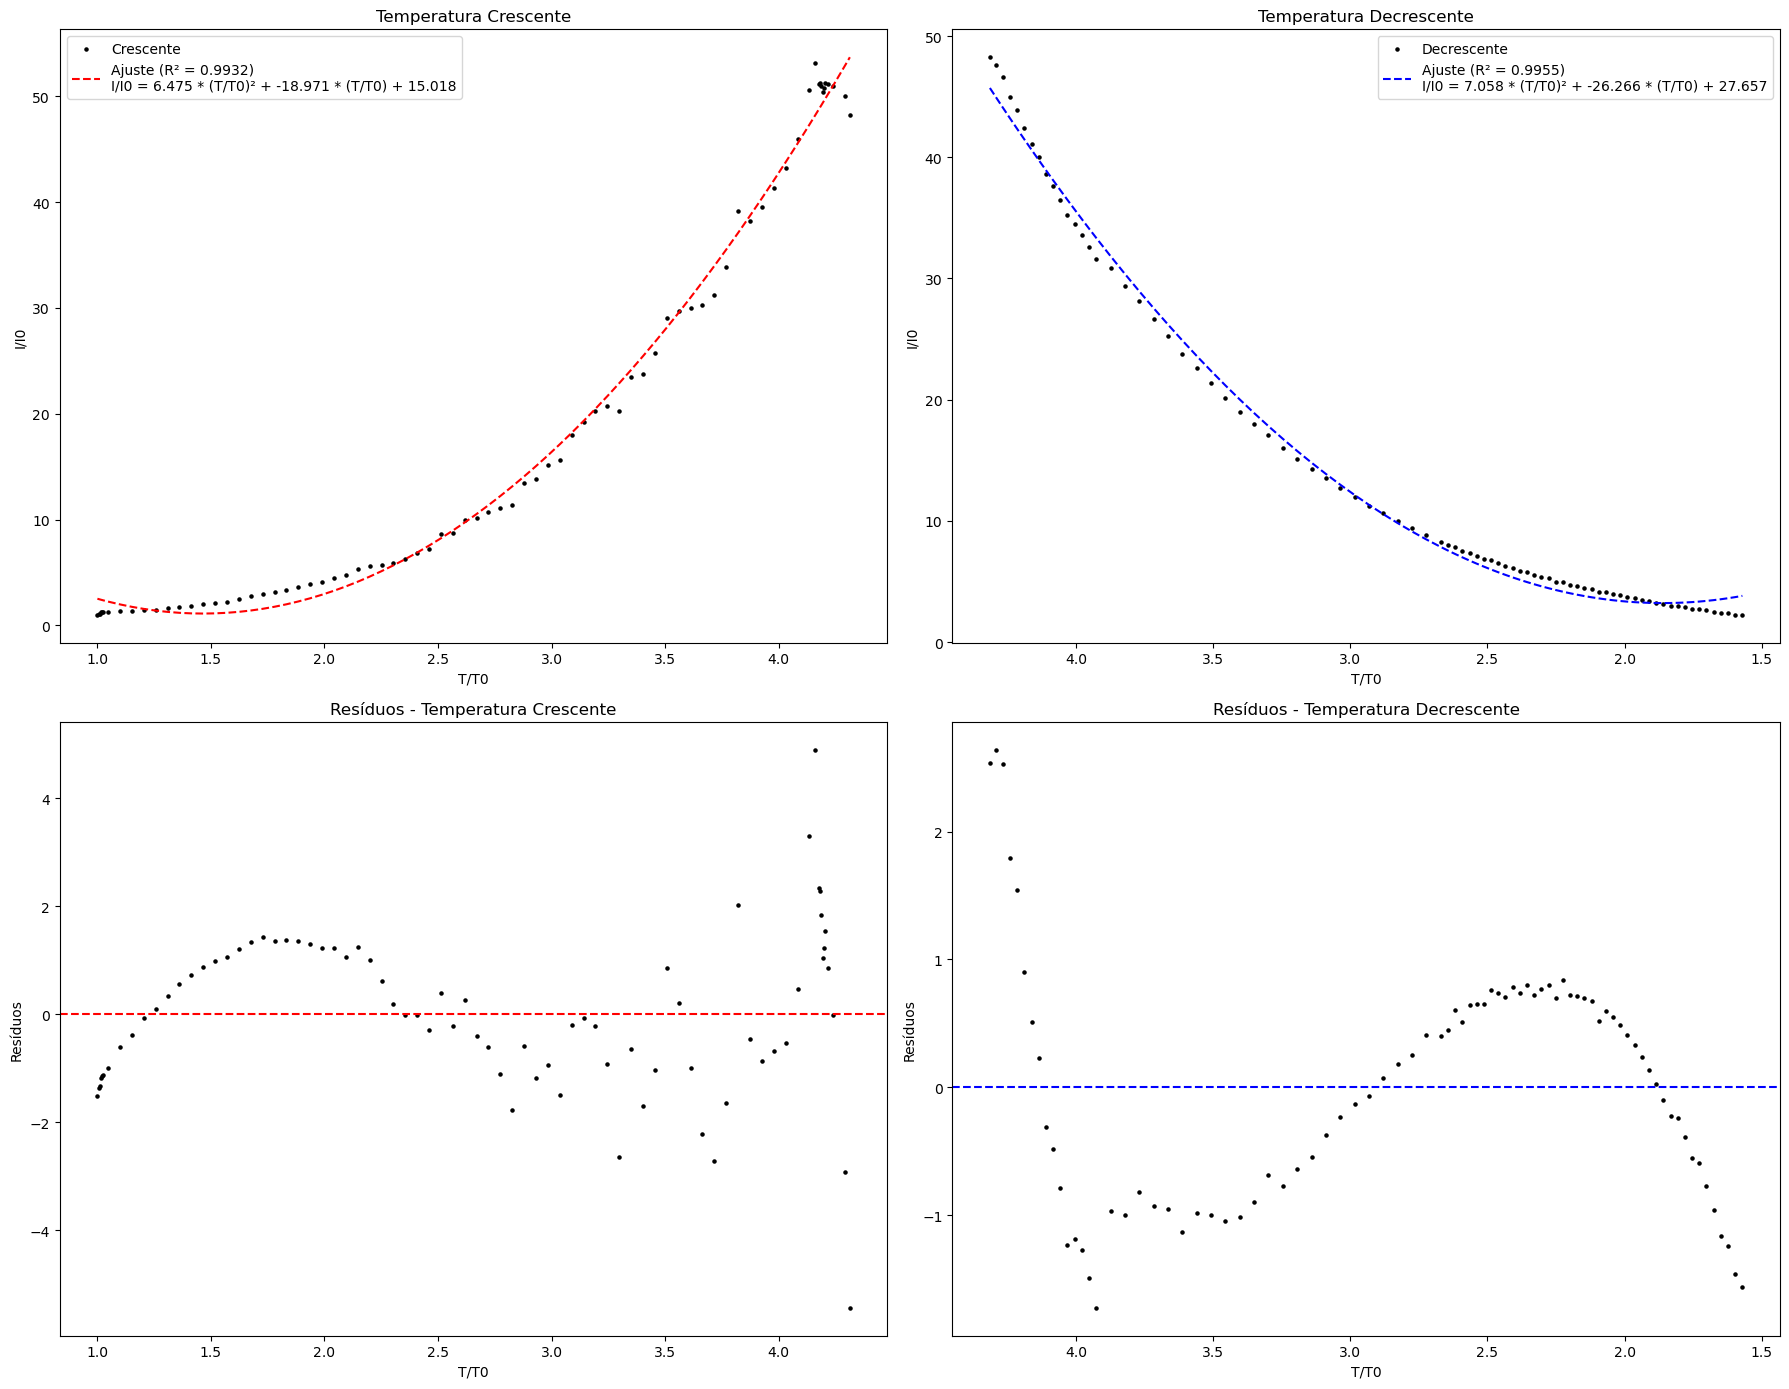

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir I0 e T0 a partir do primeiro valor dos dados crescentes
I0 = dados_crescentes['Amperagem(µA)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]

# Calcular I/I0 e T/T0 para os dados crescentes
dados_crescentes['I/I0'] = dados_crescentes['Amperagem(µA)'] / I0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular I/I0 e T/T0 para os dados decrescentes usando o mesmo I0 e T0
dados_decrescentes['I/I0'] = dados_decrescentes['Amperagem(µA)'] / I0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Função polinomial de grau 2 para o ajuste
def func_poly2(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste polinomial de grau 2 para os dados crescentes
params_crescentes, _ = curve_fit(func_poly2, dados_crescentes['T/T0'], dados_crescentes['I/I0'])
a_cres, b_cres, c_cres = params_crescentes

# Calcular R^2 para os dados crescentes
y_cres = dados_crescentes['I/I0']
y_cres_fit = func_poly2(dados_crescentes['T/T0'], a_cres, b_cres, c_cres)
ss_res_cres = np.sum((y_cres - y_cres_fit) ** 2)
ss_tot_cres = np.sum((y_cres - np.mean(y_cres)) ** 2)
r2_cres = 1 - (ss_res_cres / ss_tot_cres)

# Ajuste polinomial de grau 2 para os dados decrescentes
params_decrescentes, _ = curve_fit(func_poly2, dados_decrescentes['T/T0'], dados_decrescentes['I/I0'])
a_dec, b_dec, c_dec = params_decrescentes

# Calcular R^2 para os dados decrescentes
y_dec = dados_decrescentes['I/I0']
y_dec_fit = func_poly2(dados_decrescentes['T/T0'], a_dec, b_dec, c_dec)
ss_res_dec = np.sum((y_dec - y_dec_fit) ** 2)
ss_tot_dec = np.sum((y_dec - np.mean(y_dec)) ** 2)
r2_dec = 1 - (ss_res_dec / ss_tot_dec)

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes com ajuste polinomial de grau 2
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['I/I0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], y_cres_fit, color='red', linestyle='--', 
              label=f'Ajuste (R² = {r2_cres:.4f})\nI/I0 = {a_cres:.3f} * (T/T0)² + {b_cres:.3f} * (T/T0) + {c_cres:.3f}')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('I/I0')
ax[0, 0].legend()

# Gráfico para os dados decrescentes com ajuste polinomial de grau 2
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['I/I0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], y_dec_fit, color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r2_dec:.4f})\nI/I0 = {a_dec:.3f} * (T/T0)² + {b_dec:.3f} * (T/T0) + {c_dec:.3f}')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('I/I0')
ax[0, 1].legend()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], y_cres - y_cres_fit, color='black', s=5)
ax[1, 0].axhline(0, color='red', linestyle='--')
ax[1, 0].set_title('Resíduos - Temperatura Crescente')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico dos resíduos para os dados decrescentes
ax[1, 1].scatter(dados_decrescentes['T/T0'], y_dec - y_dec_fit, color='black', s=5)
ax[1, 1].axhline(0, color='blue', linestyle='--')
ax[1, 1].set_title('Resíduos - Temperatura Decrescente')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente
ax[0, 1].invert_xaxis()
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Cúbica

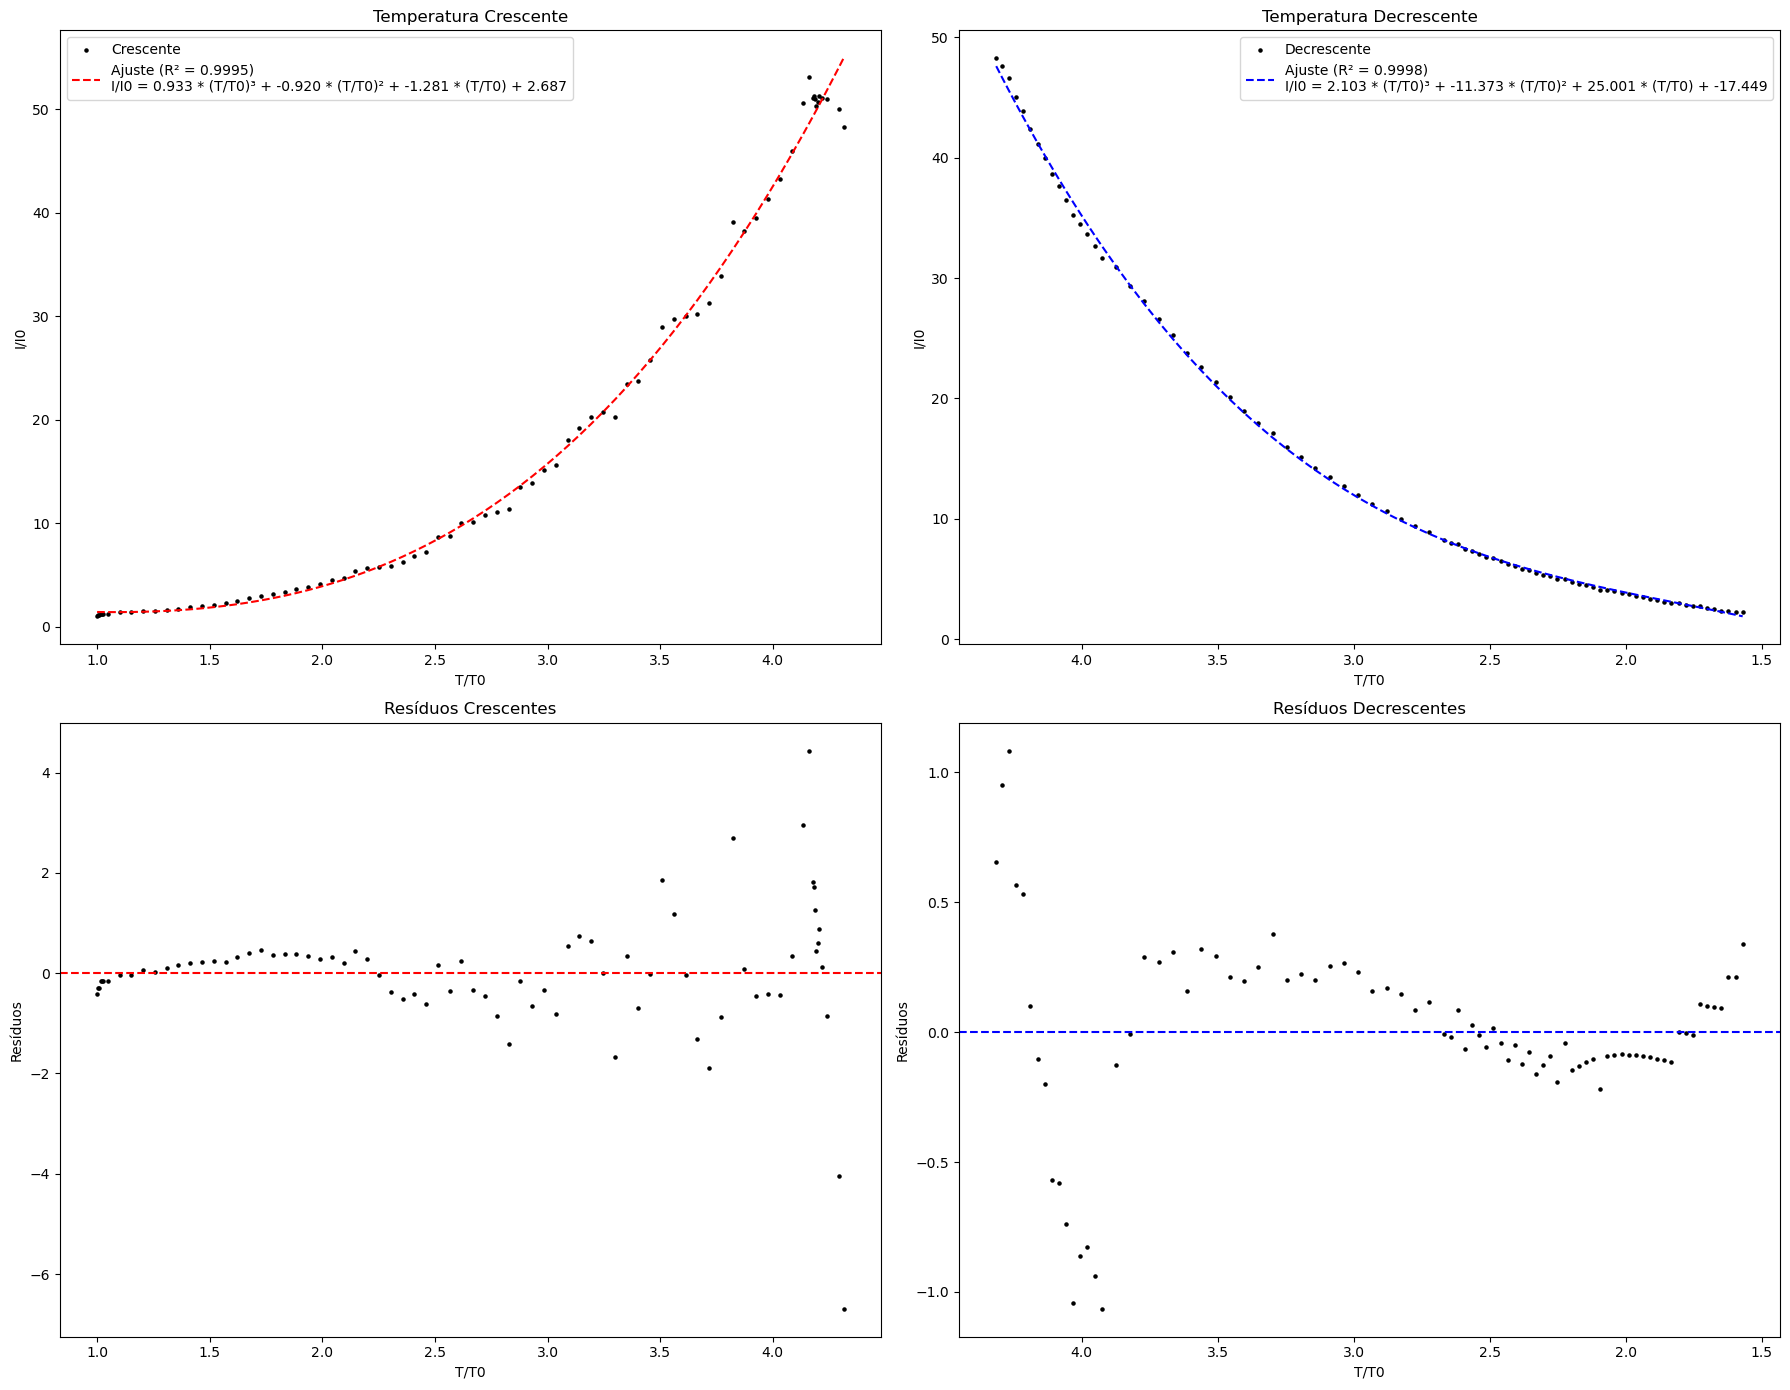

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir I0 e T0 a partir do primeiro valor dos dados crescentes
I0 = dados_crescentes['Amperagem(µA)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0]

# Calcular I/I0 e T/T0 para os dados crescentes
dados_crescentes['I/I0'] = dados_crescentes['Amperagem(µA)'] / I0
dados_crescentes['T/T0'] = dados_crescentes['Temperatura (C)'] / T0

# Calcular I/I0 e T/T0 para os dados decrescentes usando o mesmo I0 e T0
dados_decrescentes['I/I0'] = dados_decrescentes['Amperagem(µA)'] / I0
dados_decrescentes['T/T0'] = dados_decrescentes['Temperatura (C)'] / T0

# Ordenar os dados decrescentes de T/T0 para representar a temperatura a baixar
dados_decrescentes = dados_decrescentes.sort_values(by='T/T0', ascending=False).reset_index(drop=True)

# Função polinomial de grau 3 para o ajuste
def func_poly(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Ajuste polinomial de grau 3 para os dados crescentes
params_crescentes, _ = curve_fit(func_poly, dados_crescentes['T/T0'], dados_crescentes['I/I0'])
a_cres, b_cres, c_cres, d_cres = params_crescentes

# Calcular R^2 para os dados crescentes
y_cres = dados_crescentes['I/I0']
y_cres_fit = func_poly(dados_crescentes['T/T0'], a_cres, b_cres, c_cres, d_cres)
residuos_cres = y_cres - y_cres_fit  # Resíduos para os dados crescentes

# Ajuste polinomial de grau 3 para os dados decrescentes
params_decrescentes, _ = curve_fit(func_poly, dados_decrescentes['T/T0'], dados_decrescentes['I/I0'])
a_dec, b_dec, c_dec, d_dec = params_decrescentes

# Calcular R^2 para os dados decrescentes
y_dec = dados_decrescentes['I/I0']
y_dec_fit = func_poly(dados_decrescentes['T/T0'], a_dec, b_dec, c_dec, d_dec)
residuos_dec = y_dec - y_dec_fit  # Resíduos para os dados decrescentes

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes
ax[0, 0].scatter(dados_crescentes['T/T0'], dados_crescentes['I/I0'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T/T0'], y_cres_fit, color='red', linestyle='--', 
              label=f'Ajuste (R² = {r2_cres:.4f})\nI/I0 = {a_cres:.3f} * (T/T0)³ + {b_cres:.3f} * (T/T0)² + {c_cres:.3f} * (T/T0) + {d_cres:.3f}')
ax[0, 0].set_title('Temperatura Crescente')
ax[0, 0].set_xlabel('T/T0')
ax[0, 0].set_ylabel('I/I0')
ax[0, 0].legend()

# Gráfico dos resíduos para os dados crescentes
ax[1, 0].scatter(dados_crescentes['T/T0'], residuos_cres, color='black', s=5, label='Resíduos')
ax[1, 0].axhline(0, color='red', linestyle='--', label='Resíduo = 0')
ax[1, 0].set_title('Resíduos Crescentes')
ax[1, 0].set_xlabel('T/T0')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico para os dados decrescentes com T/T0 em ordem inversa
ax[0, 1].scatter(dados_decrescentes['T/T0'], dados_decrescentes['I/I0'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T/T0'], y_dec_fit, color='blue', linestyle='--', 
              label=f'Ajuste (R² = {r2_dec:.4f})\nI/I0 = {a_dec:.3f} * (T/T0)³ + {b_dec:.3f} * (T/T0)² + {c_dec:.3f} * (T/T0) + {d_dec:.3f}')
ax[0, 1].set_title('Temperatura Decrescente')
ax[0, 1].set_xlabel('T/T0')
ax[0, 1].set_ylabel('I/I0')
ax[0, 1].legend()

# Gráfico dos resíduos para os dados decrescentes
ax[1, 1].scatter(dados_decrescentes['T/T0'], residuos_dec, color='black', s=5, label='Resíduos')
ax[1, 1].axhline(0, color='blue', linestyle='--', label='Resíduo = 0')
ax[1, 1].set_title('Resíduos Decrescentes')
ax[1, 1].set_xlabel('T/T0')
ax[1, 1].set_ylabel('Resíduos')

# Inverter o eixo x do gráfico decrescente
ax[0, 1].invert_xaxis()
ax[1, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

## log(I) em função de 1/T

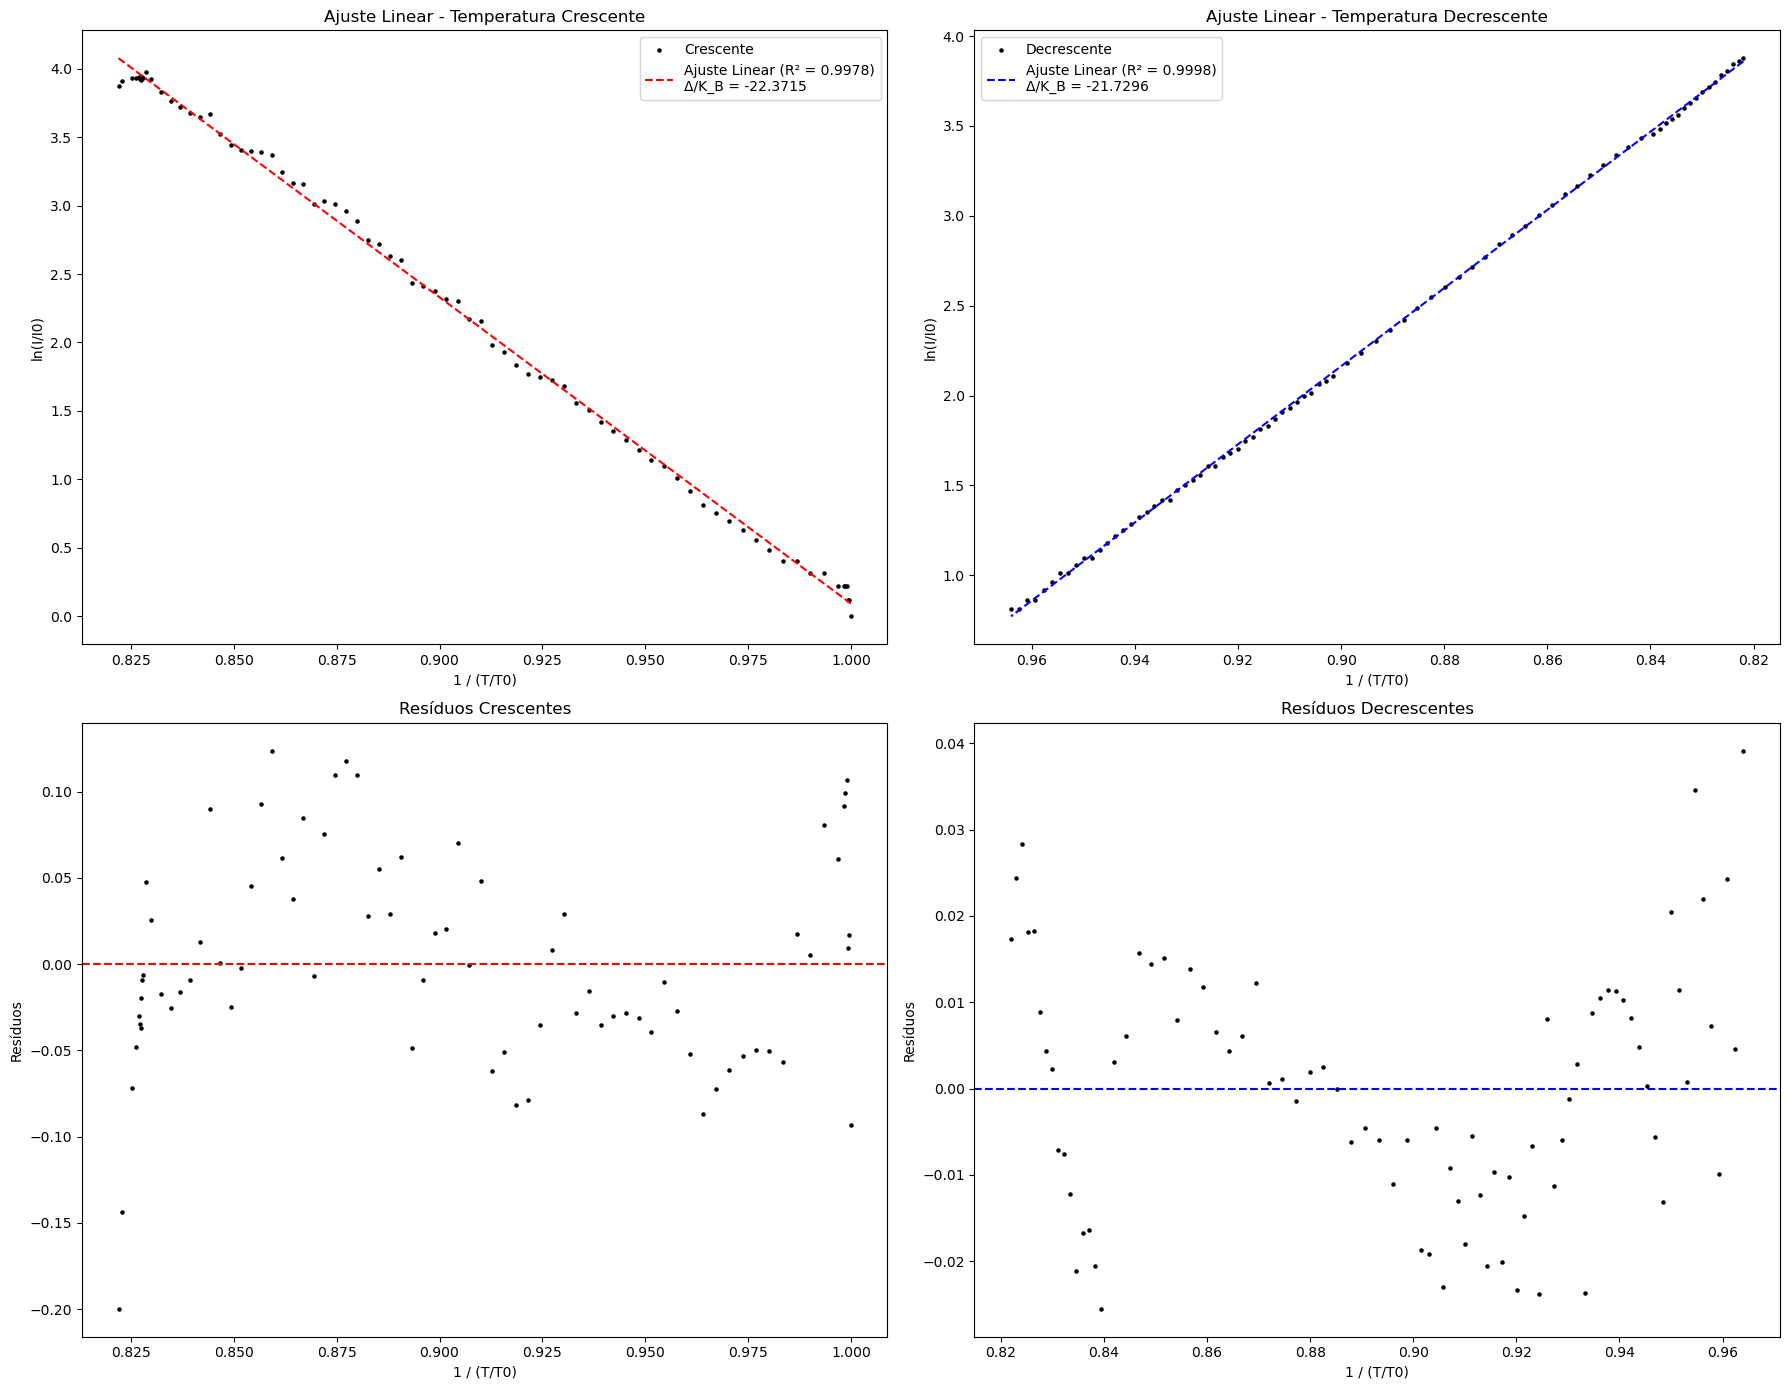

m = -22.371453419020956
Δ/K_B (Crescente) = 22.3715
Incerteza em Δ/K_B (Crescente) = 0.1216
Δ (Crescente) = 3.0887e-22 J
Δ (Crescente) = 1.9278e-03 eV
Δ/K_B (Decrescente) = 21.7296
Incerteza em Δ/K_B (Decrescente) = 0.0362
Δ (Decrescente) = 3.0001e-22 J
Δ (Decrescente) = 1.8725e-03 eV


In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Definir I0 e T0 a partir do primeiro valor dos dados crescentes, convertendo T0 para Kelvin
I0 = dados_crescentes['Amperagem(µA)'].iloc[0]
T0 = dados_crescentes['Temperatura (C)'].iloc[0] + 273.15

# Calcular I/I0 e T/T0 para os dados crescentes e decrescentes (com T convertido para Kelvin)
dados_crescentes['I/I0'] = dados_crescentes['Amperagem(µA)'] / I0
dados_crescentes['T/T0'] = (dados_crescentes['Temperatura (C)'] + 273.15) / T0
dados_decrescentes['I/I0'] = dados_decrescentes['Amperagem(µA)'] / I0
dados_decrescentes['T/T0'] = (dados_decrescentes['Temperatura (C)'] + 273.15) / T0

# Calcular ln(I/I0) e 1/(T/T0) para os dados crescentes e decrescentes
dados_crescentes['ln(I/I0)'] = np.log(dados_crescentes['I/I0'])
dados_crescentes['1/(T/T0)'] = 1 / dados_crescentes['T/T0']
dados_decrescentes['ln(I/I0)'] = np.log(dados_decrescentes['I/I0'])
dados_decrescentes['1/(T/T0)'] = 1 / dados_decrescentes['T/T0']

# Ajuste linear para ln(I/I0) vs 1/(T/T0) para os dados crescentes
slope_cres, intercept_cres, r_value_cres, p_value_cres, std_err_cres = linregress(dados_crescentes['1/(T/T0)'], dados_crescentes['ln(I/I0)'])

# Ajuste linear para ln(I/I0) vs 1/(T/T0) para os dados decrescentes
slope_dec, intercept_dec, r_value_dec, p_value_dec, std_err_dec = linregress(dados_decrescentes['1/(T/T0)'], dados_decrescentes['ln(I/I0)'])

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes de ln(I/I0) vs 1/(T/T0)
ax[0, 0].scatter(dados_crescentes['1/(T/T0)'], dados_crescentes['ln(I/I0)'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['1/(T/T0)'], slope_cres * dados_crescentes['1/(T/T0)'] + intercept_cres, color='red', linestyle='--', 
              label=f'Ajuste Linear (R² = {r_value_cres**2:.4f})\nΔ/K_B = {slope_cres:.4f}')
ax[0, 0].set_title('Ajuste Linear - Temperatura Crescente')
ax[0, 0].set_xlabel('1 / (T/T0)')
ax[0, 0].set_ylabel('ln(I/I0)')
ax[0, 0].legend()

# Gráfico dos resíduos para os dados crescentes
residuos_cres = dados_crescentes['ln(I/I0)'] - (slope_cres * dados_crescentes['1/(T/T0)'] + intercept_cres)
ax[1, 0].scatter(dados_crescentes['1/(T/T0)'], residuos_cres, color='black', s=5, label='Resíduos')
ax[1, 0].axhline(0, color='red', linestyle='--', label='Resíduo = 0')
ax[1, 0].set_title('Resíduos Crescentes')
ax[1, 0].set_xlabel('1 / (T/T0)')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico para os dados decrescentes de ln(I/I0) vs 1/(T/T0)
ax[0, 1].scatter(dados_decrescentes['1/(T/T0)'], dados_decrescentes['ln(I/I0)'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['1/(T/T0)'], slope_dec * dados_decrescentes['1/(T/T0)'] + intercept_dec, color='blue', linestyle='--', 
              label=f'Ajuste Linear (R² = {r_value_dec**2:.4f})\nΔ/K_B = {slope_dec:.4f}')
ax[0, 1].set_title('Ajuste Linear - Temperatura Decrescente')
ax[0, 1].set_xlabel('1 / (T/T0)')
ax[0, 1].set_ylabel('ln(I/I0)')
ax[0, 1].legend()

# Gráfico dos resíduos para os dados decrescentes
residuos_dec = dados_decrescentes['ln(I/I0)'] - (slope_dec * dados_decrescentes['1/(T/T0)'] + intercept_dec)
ax[1, 1].scatter(dados_decrescentes['1/(T/T0)'], residuos_dec, color='black', s=5, label='Resíduos')
ax[1, 1].axhline(0, color='blue', linestyle='--', label='Resíduo = 0')
ax[1, 1].set_title('Resíduos Decrescentes')
ax[1, 1].set_xlabel('1 / (T/T0)')
ax[1, 1].set_ylabel('Resíduos')

ax[0, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

print(f"m = {slope_cres}")

# Exibir os valores de Δ/K_B (slope) e Δ de forma mais precisa
print(f"Δ/K_B (Crescente) = {-slope_cres:.4f}")
print(f"Incerteza em Δ/K_B (Crescente) = {std_err_cres:.4f}")
print(f"Δ (Crescente) = {-slope_cres*1.380649e-23:.4e} J")  # Usando notação científica
print(f"Δ (Crescente) = {-slope_cres*8.617333262e-5:.4e} eV")  # Usando notação científica

print(f"Δ/K_B (Decrescente) = {-slope_dec:.4f}")
print(f"Incerteza em Δ/K_B (Decrescente) = {std_err_dec:.4f}")
print(f"Δ (Decrescente) = {-slope_dec*1.380649e-23:.4e} J")  # Usando notação científica
print(f"Δ (Decrescente) = {-slope_dec*8.617333262e-5:.4e} eV")  # Usando notação científica

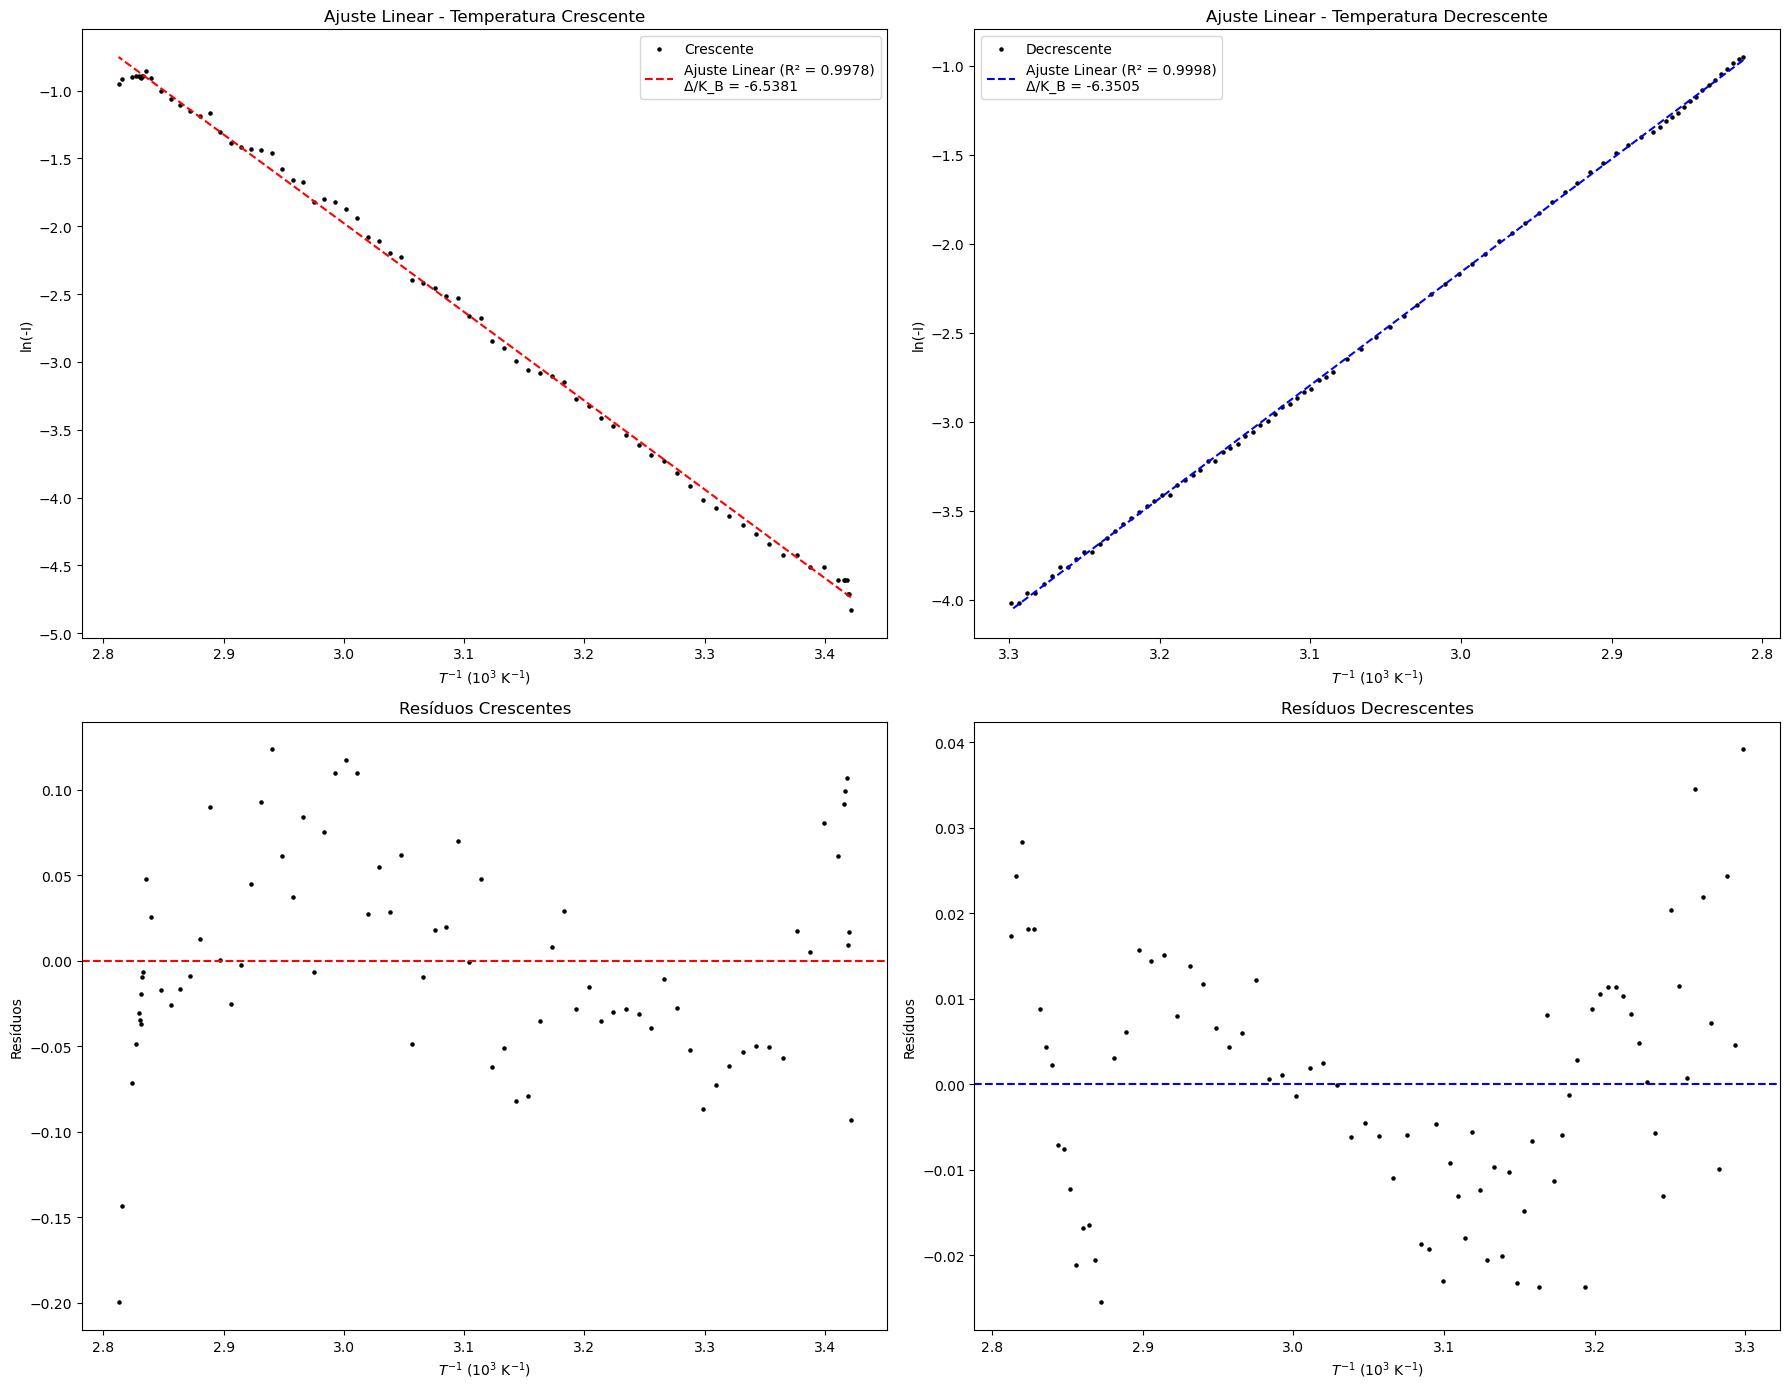

Δ/K_B (Crescente) = 6.5381
Incerteza em Δ/K_B (Crescente) = 0.0355
Δ (Crescente) = 9.0268e-20 J
Δ (Crescente) = 5.6341e-01 eV
Δ/K_B (Decrescente) = 6.3505
Incerteza em Δ/K_B (Decrescente) = 0.0106
Δ (Decrescente) = 8.7678e-20 J
Δ (Decrescente) = 5.4724e-01 eV


In [270]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Carregar os dados dos ficheiros
dados_crescentes = pd.read_csv('dados_crescentes.csv')
dados_decrescentes = pd.read_csv('dados_decrescentes.csv')

# Calcular -I para os valores de corrente
dados_crescentes['-I'] = -dados_crescentes['Amperagem(µA)']
dados_decrescentes['-I'] = -dados_decrescentes['Amperagem(µA)']

# Recalcular ln(-I) e ajustar o eixo x para T^-1 em 10^3 K^-1
dados_crescentes['ln(-I)'] = np.log(dados_crescentes['-I'])
dados_decrescentes['ln(-I)'] = np.log(dados_decrescentes['-I'])
dados_crescentes['T^-1 (10^3 K^-1)'] = 1000 / (dados_crescentes['Temperatura (C)'] + 273.15)
dados_decrescentes['T^-1 (10^3 K^-1)'] = 1000 / (dados_decrescentes['Temperatura (C)'] + 273.15)

# Ajuste linear para os dados transformados
slope_cres, intercept_cres, r_value_cres, p_value_cres, std_err_cres = linregress(
    dados_crescentes['T^-1 (10^3 K^-1)'], dados_crescentes['ln(-I)']
)
slope_dec, intercept_dec, r_value_dec, p_value_dec, std_err_dec = linregress(
    dados_decrescentes['T^-1 (10^3 K^-1)'], dados_decrescentes['ln(-I)']
)

# Criar os gráficos em subplots
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Gráfico para os dados crescentes de ln(-I) vs T^-1
ax[0, 0].scatter(dados_crescentes['T^-1 (10^3 K^-1)'], dados_crescentes['ln(-I)'], color='black', s=5, label='Crescente')
ax[0, 0].plot(dados_crescentes['T^-1 (10^3 K^-1)'], slope_cres * dados_crescentes['T^-1 (10^3 K^-1)'] + intercept_cres, 
              color='red', linestyle='--', label=f'Ajuste Linear (R² = {r_value_cres**2:.4f})\nΔ/K_B = {slope_cres:.4f}')
ax[0, 0].set_title('Ajuste Linear - Temperatura Crescente')
ax[0, 0].set_xlabel('$T^{-1}$ ($10^3$ K$^{-1}$)')
ax[0, 0].set_ylabel('ln(-I)')
ax[0, 0].legend()

# Gráfico dos resíduos para os dados crescentes
residuos_cres = dados_crescentes['ln(-I)'] - (slope_cres * dados_crescentes['T^-1 (10^3 K^-1)'] + intercept_cres)
ax[1, 0].scatter(dados_crescentes['T^-1 (10^3 K^-1)'], residuos_cres, color='black', s=5, label='Resíduos')
ax[1, 0].axhline(0, color='red', linestyle='--', label='Resíduo = 0')
ax[1, 0].set_title('Resíduos Crescentes')
ax[1, 0].set_xlabel('$T^{-1}$ ($10^3$ K$^{-1}$)')
ax[1, 0].set_ylabel('Resíduos')

# Gráfico para os dados decrescentes de ln(-I) vs T^-1
ax[0, 1].scatter(dados_decrescentes['T^-1 (10^3 K^-1)'], dados_decrescentes['ln(-I)'], color='black', s=5, label='Decrescente')
ax[0, 1].plot(dados_decrescentes['T^-1 (10^3 K^-1)'], slope_dec * dados_decrescentes['T^-1 (10^3 K^-1)'] + intercept_dec, 
              color='blue', linestyle='--', label=f'Ajuste Linear (R² = {r_value_dec**2:.4f})\nΔ/K_B = {slope_dec:.4f}')
ax[0, 1].set_title('Ajuste Linear - Temperatura Decrescente')
ax[0, 1].set_xlabel('$T^{-1}$ ($10^3$ K$^{-1}$)')
ax[0, 1].set_ylabel('ln(-I)')
ax[0, 1].legend()

# Gráfico dos resíduos para os dados decrescentes
residuos_dec = dados_decrescentes['ln(-I)'] - (slope_dec * dados_decrescentes['T^-1 (10^3 K^-1)'] + intercept_dec)
ax[1, 1].scatter(dados_decrescentes['T^-1 (10^3 K^-1)'], residuos_dec, color='black', s=5, label='Resíduos')
ax[1, 1].axhline(0, color='blue', linestyle='--', label='Resíduo = 0')
ax[1, 1].set_title('Resíduos Decrescentes')
ax[1, 1].set_xlabel('$T^{-1}$ ($10^3$ K$^{-1}$)')
ax[1, 1].set_ylabel('Resíduos')

ax[0, 1].invert_xaxis()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

# Exibir os valores de Δ/K_B e Δ
print(f"Δ/K_B (Crescente) = {-slope_cres:.4f}")
print(f"Incerteza em Δ/K_B (Crescente) = {std_err_cres:.4f}")
print(f"Δ (Crescente) = {-slope_cres * 1e3 * 1.380649e-23:.4e} J")
print(f"Δ (Crescente) = {-slope_cres * 1e3 * 8.617333262e-5:.4e} eV")

print(f"Δ/K_B (Decrescente) = {-slope_dec:.4f}")
print(f"Incerteza em Δ/K_B (Decrescente) = {std_err_dec:.4f}")
print(f"Δ (Decrescente) = {-slope_dec * 1e3 * 1.380649e-23:.4e} J")
print(f"Δ (Decrescente) = {-slope_dec * 1e3 * 8.617333262e-5:.4e} eV")
